## Import Libraries

In [21]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from datetime import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Secondary School

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_excel(r'C:\Users\hp\OneDrive\Documents\Code Playground\Prash Project\excel_files\samarqand_student_data 1.xlsx')

### Dataset First View

In [288]:
# Dataset First Look
df.head()

,id,Region name,District name,School name,Elementary (Grades 1-4),Enter the year the building was constructed,"If completed, enter the year",Total design capacity of the school (student capacity – enter the number of student places according to the approved construction project or passport),"Number of shifts (1, 2, or 3)",Between grades 1-4,Between grades 5-9,Between grades 10-11,Available vacant land area on the school premises for the construction of an additional academic building,"Number of academic buildings (do not include branch campuses, if any)",Number of floors:,Enter the type of wall material:,Condition of the building walls,Building foundations,Condition of the concrete slabs (ceiling) between floors,Enter the type of roofing material of the building,Condition of the building roof,Condition of windows and frames in classrooms,Condition of the floors in classrooms,Condition of the doors in classrooms,Is the condition of the library satisfactory?,Condition of the gymnasium,Condition of the stadium,"Availability of sports equipment in accordance with standards (balls, benches, ropes, mats, dumbbells, rings, sticks, chess, etc.)",Condition of the assembly hall,Condition of the kitchen,Availability of drinking water and handwashing facilities in the kitchen,Condition of electricity supply throughout the day,Is there a generator in the school?,Are there solar panels in the school (above 10 kW),Condition of the internal electrical system,Condition of the lighting system,Source of the heating system,Fuel source for local or improvised heating systems,Condition of the school boiler room,Condition of the internal heating system (pipes and radiators),Availability of water in the school,Source of drinking water supply,Are there concrete/asphalt pathways between buildings and outdoor restrooms?,Is the school perimeter fenced with a boundary wall?,Type of internet connection,Internet usage,Availability of fire safety equipment (fire extinguishers and other devices) and alarm systems,Availability of video surveillance cameras,Availability of public transport stops nearby,Facilities for students with musculoskeletal disorders:,Does the school have a branch?,Have any repair or reconstruction works been carried out in the building?,Total,Boys,Girls,Uzbek,Karakalpak,Russian,Tajik,Kazakh,Kyrgyz,Turkmen,Do you consider the building safe during an earthquake?,Number of floors:.1,Enter the type of wall material of the building:,Condition of the building walls.1,Building foundations.1,Condition of the concrete slabs (ceiling) between floors.1,Do you consider the building safe during an earthquake?.1,Enter the type of roofing material of the building:,Condition of the building roof.1,Condition of windows and frames in classrooms.1,Condition of the floors in classrooms.1,Condition of the doors in classrooms.1,Number of floors:.2,Enter the type of wall material of the building:.1,Condition of the building walls.2,Building foundations.2,Condition of the concrete slabs (ceiling) between floors.2,Do you consider the building safe during an earthquake?.2,Enter the type of roofing material of the building.1,Condition of the building roof.2,Condition of windows and frames in classrooms.2,Condition of the floors in classrooms.2,Condition of the doors in classrooms.2,Where is the functioning restroom located in the school?,Condition of water supply inside the restrooms,Is the restroom connected to the central sewage system?,Total.1,Men,Women,Availability of doors and partitions in restroom stalls,Availability of water and soap for handwashing near restrooms,Do you think the restroom is safe for children?,Do you think there is a connection between the condition of restrooms and students' willingness to attend school?,Are there any issues connecting the indoor restrooms to the sewage system?,Are there any issues connecting the indoor restrooms to the water supply system?,"Are there lights inside the restrooms, and are they safe for children?",Is the p

### Dataset Rows & Columns count

In [289]:
# Dataset Rows & Columns count
df.shape

(1261, 109)

### Dataset Information

In [290]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Columns: 109 entries, id to What is the condition of the adapted (community-built, sponsored, stone, wood, or adobe) restroom?
dtypes: float64(16), int64(13), object(80)
memory usage: 1.0+ MB


#### Duplicate Values

In [291]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    1261
Name: count, dtype: int64

#### Missing Values/Null Values

In [292]:
# Missing Values/Null Values Count
df.isnull().sum()

# columns where all the values are missing
null_counts = df.isnull().sum()
columns_with_1261_nulls = null_counts[null_counts == 1261]
columns_with_1261_nulls

# We will directly drop these columns
df = df.drop(columns_with_1261_nulls.index, axis=1)

# columns where the null values are greater than 1000
null_counts = df.isnull().sum()
columns_with_1000_nulls = null_counts[null_counts > 1000]
columns_with_1000_nulls

"""
Russian                                                                                               1164
Tajik                                                                                                 1235
Enter the type of wall material of the building:.1                                                    1137
Condition of the building walls.2                                                                     1137
Do you consider the building safe during an earthquake?.2                                             1137
Enter the type of roofing material of the building.1                                                  1137
Condition of the building roof.2                                                                      1137
Condition of windows and frames in classrooms.2                                                       1137
Condition of the floors in classrooms.2                                                               1137
Condition of the doors in classrooms.2                                                                1137
What is the condition of the adapted (community-built, sponsored, stone, wood, or adobe) restroom?    1147
dtype: int64
"""
# We can see that most of these columns are getting repeated, so we will drop them right away
df = df.drop(columns_with_1000_nulls.index, axis=1)

df.isnull().sum()

# columns where the null values are greater than 100
null_counts = df.isnull().sum()
columns_with_100_nulls = null_counts[null_counts > 100]
columns_with_100_nulls

"""
If completed, enter the year                                       406
Enter the type of wall material of the building:                   688
Condition of the building walls.1                                  688
Do you consider the building safe during an earthquake?.1          689
Enter the type of roofing material of the building:                690
Condition of the building roof.1                                   691
Condition of windows and frames in classrooms.1                    691
Condition of the floors in classrooms.1                            691
Condition of the doors in classrooms.1                             691
What is the condition of the standard (project-based) restroom?    179
dtype: int64
"""
# Here also, we can see that most of these columns are getting repeated, so we will drop them right away but we will only drop the columns that are getting repeated
repeated_columns = ['Condition of the building walls.1', 'Do you consider the building safe during an earthquake?.1', 'Condition of the building roof.1', 'Condition of windows and frames in classrooms.1', 'Condition of the floors in classrooms.1', 'Condition of the doors in classrooms.1']
df = df.drop(repeated_columns, axis=1)

# The rest of the missing values we will handle later


In [293]:
# Shape of the data after removing null values
df.shape

(1261, 79)

### What did you know about your dataset?

Our dataset had 1261 rows and 109 columns.
Data types of the columns are as follows:-
- float64(16), 
- int64(13), 
- object(80)

There were no fully duplicated rows found in the dataset.
However there were many repeated columns in the dataset, where there was 100% null values. Hence, these columns were dropped.
There were many other columns with more than 1000 null values. Hence, these columns were dropped, because most of them were repeated and the others were not useful.
Few more columns were there with more than 100 null values and repeated columns. Hence, these columns were dropped.
Rest of the null values will be handled accordingly as we move forward in the analysis.

After this pocess the shape of the dataset is as follows:
(1261, 79)


## Hospital Data

### Dataset Loading

In [9]:
hospital_df = r"C:\Users\pc\OneDrive\Documents\Dev_Tools\test_codes\social_infra\excel_files\Hospitals_Samarkand.xlsx"
hospital_df = pd.read_excel(hospital_df)

### Basic Data Info

In [10]:
# print(f"Dataset Shape: {hospital_df.shape}")
# print(f"Dataset columns: {hospital_df.columns}")

#creating a copy of the original dataset to maintain it's originality
hos_df = hospital_df.copy()

In [11]:
# first of all le's rename the columns to make them shorter and more readable
column_map = {
    'Region name': 'region',
    'District name': 'district',
    'Number of branches outside the region': 'outside_branches',
    'Total land area of the hospital': 'land_area_total',
    'Land area occupied by buildings and structures': 'land_area_built',
    'Enter the year of construction of the hospital': 'year_built',
    'If renovated, enter the year of renovation': 'year_renovated',
    'Total design capacity of the hospital': 'design_capacity',
    'Available vacant land area on the hospital’s territory for constructing an additional building (approximately in sotih-100 metr square)': 'vacant_land_area',
    'Number of hospital buildings (if you have a branch, do not include its buildings)': 'building_count',
    'Number of floors': 'floors',
    'Enter the type of wall material of the building': 'wall_material',
    'Condition of the building walls': 'wall_condition',
    'Building foundations': 'foundation',
    'Condition of the concrete slabs (ceilings) between floors': 'ceiling_condition',
    'Enter the type of roofing material used for the building': 'roof_material',
    'Condition of the building roof': 'roof_condition',
    'Condition of windows and frames in classrooms': 'window_condition',
    'Condition of the floors in hospital': 'floor_condition',
    'Condition of the doors in hospital': 'door_condition',
    'Availability of drinking and hand washing water supply in the toilet': 'toilet_water_supply',
    'Condition of the electricity supply throughout the day': 'electricity_supply',
    'Is there a generator in the hospital?': 'has_generator',
    'Are there solar panels (above 10 kW) in the hospital?': 'has_solar_panels',
    'Condition of the internal electrical system': 'internal_electric_condition',
    'Condition of the lighting system': 'lighting_condition',
    'Source of the heating system': 'heating_source',
    'Condition of the internal heating system (pipes and radiators)': 'heating_condition',
    'Availability of water in the hospital': 'has_water',
    'Source of drinking water supply': 'drinking_water_source',
    'Are there concrete/asphalt pathways between the buildings and outdoor restrooms?': 'has_pathways',
    'Is the hospital surrounded by a fence wall?': 'has_fence',
    'Type of internet connection': 'internet_type',
    'Availability of fire safety equipment (fire extinguishers and other devices) and alarm systems': 'fire_safety',
    'Availability of video surveillance cameras': 'has_cctv',
    'Availability of public transport stops nearby': 'has_transport_nearby',
    'Have repair or reconstruction works been carried out?': 'recent_repairs',
    'Do you consider the building safe during an earthquake?': 'earthquake_safe',
    'Where is the functioning restroom located in the hospital?': 'restroom_location',
    'Condition of the water supply inside the restrooms': 'restroom_water_condition',
    'Is the restroom connected to the central sewage (canalization) system?': 'restroom_has_sewage',
    'Availability of doors and partitions in restroom stalls': 'restroom_doors',
    'Availability of water and soap for handwashing near restrooms': 'restroom_handwash_available',
    'Do you think the restroom is safe for patient?': 'restroom_safe',
    'Are there any issues with connecting indoor restrooms to the sewage (wastewater) system?': 'restroom_sewage_issues',
    'Are there any issues with connecting indoor restrooms to the water supply system?': 'restroom_water_issues',
    'Are there lights inside the restrooms, and are they safe for patient?': 'restroom_light_safe',
    'Is the pathway to the restroom illuminated with lights and safe for patient?': 'restroom_path_safe',
    'Do you think the hospital are warm during the autumn-winter season?': 'is_warm_in_winter',
    'Has a water pipeline been installed inside the hospital building, and does water flow through it?': 'has_water_pipeline',
    'Are you satisfied with the condition of your hospital?': 'satisfaction',
    'Total_employee_number': 'total_staff',
    'Number of medical personnel': 'medical_staff',
    'Number of visitors to the hospital': 'visitor_count',
    'Hospital bed capacity': 'bed_capacity'
}

hos_df.rename(columns=column_map, inplace=True)

In [12]:
hos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   region                       280 non-null    object 
 1   district                     280 non-null    object 
 2   outside_branches             280 non-null    int64  
 3   land_area_total              280 non-null    int64  
 4   land_area_built              280 non-null    int64  
 5   year_built                   280 non-null    int64  
 6   year_renovated               181 non-null    float64
 7   design_capacity              280 non-null    int64  
 8   vacant_land_area             280 non-null    int64  
 9   building_count               280 non-null    int64  
 10  floors                       280 non-null    int64  
 11  wall_material                280 non-null    object 
 12  wall_condition               280 non-null    object 
 13  foundation          

In [13]:
# let's check all the columns that are completely null
null_columns = hos_df.columns[hos_df.isnull().all()]
null_columns_list = list(null_columns)
null_columns_list

# we can see all these columns as completely null hence we need to remove them completely
"""['foundation',
 'ceiling_condition',
 'has_pathways',
 'restroom_safe',
 'restroom_path_safe']"""

cols_to_drop = ['foundation', 'ceiling_condition', 'has_pathways', 'restroom_safe', 'restroom_path_safe']
hos_df = hos_df.loc[:, ~hos_df.columns.isin(cols_to_drop)]
hos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   region                       280 non-null    object 
 1   district                     280 non-null    object 
 2   outside_branches             280 non-null    int64  
 3   land_area_total              280 non-null    int64  
 4   land_area_built              280 non-null    int64  
 5   year_built                   280 non-null    int64  
 6   year_renovated               181 non-null    float64
 7   design_capacity              280 non-null    int64  
 8   vacant_land_area             280 non-null    int64  
 9   building_count               280 non-null    int64  
 10  floors                       280 non-null    int64  
 11  wall_material                280 non-null    object 
 12  wall_condition               280 non-null    object 
 13  roof_material       

In [14]:
hos_df.insert(2, 'hospital_name', [f'Hospital_{i:03d}' for i in range(1, len(hos_df) + 1)])

In [15]:
hos_df.columns

Index(['region', 'district', 'hospital_name', 'outside_branches',
       'land_area_total', 'land_area_built', 'year_built', 'year_renovated',
       'design_capacity', 'vacant_land_area', 'building_count', 'floors',
       'wall_material', 'wall_condition', 'roof_material', 'roof_condition',
       'window_condition', 'floor_condition', 'door_condition',
       'toilet_water_supply', 'electricity_supply', 'has_generator',
       'has_solar_panels', 'internal_electric_condition', 'lighting_condition',
       'heating_source', 'heating_condition', 'has_water',
       'drinking_water_source', 'has_fence', 'internet_type', 'fire_safety',
       'has_cctv', 'has_transport_nearby', 'recent_repairs', 'earthquake_safe',
       'restroom_location', 'restroom_water_condition', 'restroom_has_sewage',
       'restroom_doors', 'restroom_handwash_available',
       'restroom_sewage_issues', 'restroom_water_issues',
       'restroom_light_safe', 'is_warm_in_winter', 'has_water_pipeline',
       'sat

In [16]:
# let us now bifurcate the data into different parts to make the analysis easy
infra_hos_df = hos_df[['region', 'district', 'hospital_name', 'outside_branches', 'land_area_total',
       'land_area_built', 'year_built', 'year_renovated', 'design_capacity',
       'vacant_land_area', 'building_count', 'floors', 'wall_material',
       'wall_condition', 'roof_material', 'roof_condition', 'window_condition',
       'floor_condition', 'door_condition', 'earthquake_safe']]

resource_hos_df = hos_df[['region', 'district', 'hospital_name', 'toilet_water_supply',
       'electricity_supply', 'has_generator', 'has_solar_panels',
       'internal_electric_condition', 'lighting_condition', 'heating_source',
       'heating_condition', 'has_water', 'drinking_water_source', 'has_fence',
       'internet_type', 'fire_safety', 'has_cctv', 'has_transport_nearby',
       'recent_repairs', 'earthquake_safe', 'restroom_location',
       'restroom_water_condition', 'restroom_has_sewage', 'restroom_doors',
       'restroom_handwash_available', 'restroom_sewage_issues',
       'restroom_water_issues', 'restroom_light_safe', 'is_warm_in_winter',
       'has_water_pipeline', 'satisfaction']]

population_hos_df = hos_df[['region', 'district', 'hospital_name', 'total_staff', 'medical_staff',
       'visitor_count', 'bed_capacity']]


print("infra_hos_df")
display(infra_hos_df.head())

print("resource_hos_df")
display(resource_hos_df.head())

print("population_hos_df")
display(population_hos_df.head())

infra_hos_df


,region,district,hospital_name,outside_branches,land_area_total,land_area_built,year_built,year_renovated,design_capacity,vacant_land_area,building_count,floors,wall_material,wall_condition,roof_material,roof_condition,window_condition,floor_condition,door_condition,earthquake_safe
0,Samarkand,Kattakurgan city,Hospital_001,0,53,18,1985,2024.0,50,35,1,1,Concrete,"In satisfactory condition (no cracks, other fl...",profnastyle,Satisfactory (no cracks or other defects) - no...,"Satisfactory (almost all frames are adequate, ...",Satisfactory (almost all floors intact) - i.e....,"Satisfactory (almost all doors are present, in...",I don't know
1,Samarkand,Bulungur district,Hospital_002,0,3520,1760,1960,2021.0,120,0,1,2,Brick,"In satisfactory condition (no cracks, other fl...",bitumen,Satisfactory (no cracks or other defects) - no...,"Satisfactory (almost all frames are adequate, ...",Satisfactory (almost all floors intact) - i.e....,"Satisfactory (almost all doors are present, in...","Yes, safe"
2,Samarkand,Jomboy district,Hospital_003,3,4355,1088,2022,2022.0,60,1200,3,1,Concrete,"In satisfactory condition (no cracks, other fl...",profnastyle,Satisfactory (no cracks or other defects) - no...,"Satisfactory (almost all frames are adequate, ...",Satisfactory (almost all floors intact) - i.e....,"Satisfactory (almost all doors are present, in...","Yes, safe"
3,Samarkand,Narpay district,Hospital_004,0,4232,971,1938,2023.0,120,2,1,2,Brick,"In satisfactory condition (no cracks, other fl...",profnastyle,Satisfactory (no cracks or other defects) - no...,"Satisfactory (almost all frames are adequate, ...",Satisfactory (almost all floors intact) - i.e....,"Satisfactory (almost all doors are present, in...","Yes, safe"
4,Samarkand,Oqdaryo district,Hospital_005,1,25,581,2023,2023.0,90,0,1,2,Brick,"In satisfactory condition (no cracks, other fl...",profnastyle,Satisfactory (no cracks or other defects) - no...,"Satisfactory (almost all frames are adequate, ...",Satisfactory (almost all floors intact) - i.e....,"Satisfactory (almost all doors are present, in...",I don't know


resource_hos_df


,region,district,hospital_name,toilet_water_supply,electricity_supply,has_generator,has_solar_panels,internal_electric_condition,lighting_condition,heating_source,heating_condition,has_water,drinking_water_source,has_fence,internet_type,fire_safety,has_cctv,has_transport_nearby,recent_repairs,earthquake_safe,restroom_location,restroom_water_condition,restroom_has_sewage,restroom_doors,restroom_handwash_available,restroom_sewage_issues,restroom_water_issues,restroom_light_safe,is_warm_in_winter,has_water_pipeline,satisfaction
0,Samarkand,Kattakurgan city,Hospital_001,Not at all,It goes out at certain times during the day (1...,Not available,no,"Satisfactory (wires, switches, circuit breaker...",Satisfactory (fully modern electric lights LED...,Local (heating boiler room is located on schoo...,In working condition (all pipes and radiators ...,"Available, drink it",Local (well/artesian well or water tower locat...,fully wrapped,By mobile communication,Available,No,"Yes, about 500 meters away.","Yes, major repairs",I don't know,There are two places.,"Yes, the pipe is laid, but there is no water flow",There is a septic tank (special) in the school...,No,Available,No,Yes,Yes,"Yes, hot","No, there is neither water nor pipes",I am satisfied
1,Samarkand,Bulungur district,Hospital_002,There is water and a sink.,It goes out at certain times during the day (1...,Not available,no,"Satisfactory (wires, switches, circuit breaker...",Satisfactory (fully modern electric lights LED...,Centralized (Heating system-boiler room not lo...,In working condition (all pipes and radiators ...,"Available, drink it","Centralized (comes from outside the school, in...",fully wrapped,Through glass fiber or wire cable,Available,There is in the yard and inside the building.,"No, or too far","Yes, major repairs","Yes, safe",There are two places.,"Yes, water is available for handwashing and to...",There is a septic tank (special) in the school...,"There are barriers, but there are no separate ...",Available,No,No,Yes,"Yes, hot","Yes, from crane water come",I am satisfied
2,Samarkand,Jomboy district,Hospital_003,there is no sink,Almost does not turn off during the day,Available,"Available, gives energy to school","Satisfactory (wires, switches, circuit breaker...",Satisfactory (fully modern electric lights LED...,Local (heating boiler room is located on schoo...,In working condition (all pipes and radiators ...,"Available, drink it","Centralized (comes from outside the school, in...",fully wrapped,Through glass fiber or wire cable,Available,There is in the yard and inside the building.,"Yes, about 200 meters away.","Yes, major repairs","Yes, safe",There are two places.,"Yes, there is water available only for handwas...",There is a septic tank (special) in the school...,Available,Available,No,No,Yes,"Yes, hot","Yes, from crane water come",I am satisfied
3,Samarkand,Narpay district,Hospital_004,There is water and a sink.,Almost does not turn off during the day,Not available,no,"Satisfactory (wires, switches, circuit breaker...",Satisfactory (fully modern electric lights LED...,Local (heating boiler room is located on schoo...,In working condition (all pipes and radiators ...,"Available, drink it",Local (well/artesian well or water tower locat...,fully wrapped,Through glass fiber or wire cable,Available,There is in the yard and inside the building.,"Yes, about 200 meters away.","Yes, major repairs","Yes, safe",Inside the building,"Yes, water is available for handwashing and to...","Yes, it is connected to the central sewage sys...",No,Available,No,No,No,"Yes, hot","Yes, from crane water come",I am satisfied
4,Samarkand,Oqdaryo district,Hospital_005,There is water and a sink.,It goes out at certain times during the day (1...,Not available,"Available, gives energy to school","Satisfactory (wires, switches, circuit breaker...",Satisfactory (fully modern electric lights LED...,Local (heating boiler room is located on schoo...,In working condition (all pipes and radiators

population_hos_df


,region,district,hospital_name,total_staff,medical_staff,visitor_count,bed_capacity
0,Samarkand,Kattakurgan city,Hospital_001,119.0,107.0,0.0,28.0
1,Samarkand,Bulungur district,Hospital_002,65.0,50.0,250.0,10.0
2,Samarkand,Jomboy district,Hospital_003,27.0,19.0,10183.0,6.0
3,Samarkand,Narpay district,Hospital_004,NaN,NaN,NaN,NaN
4,Samarkand,Oqdaryo district,Hospital_005,24.0,18.0,50.0,5.0


### Work on individual DF

#### Infrastructure DF

In [17]:
infra_hos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            280 non-null    object 
 1   district          280 non-null    object 
 2   hospital_name     280 non-null    object 
 3   outside_branches  280 non-null    int64  
 4   land_area_total   280 non-null    int64  
 5   land_area_built   280 non-null    int64  
 6   year_built        280 non-null    int64  
 7   year_renovated    181 non-null    float64
 8   design_capacity   280 non-null    int64  
 9   vacant_land_area  280 non-null    int64  
 10  building_count    280 non-null    int64  
 11  floors            280 non-null    int64  
 12  wall_material     280 non-null    object 
 13  wall_condition    280 non-null    object 
 14  roof_material     280 non-null    object 
 15  roof_condition    280 non-null    object 
 16  window_condition  279 non-null    object 
 1

In [18]:
# let's check how many regions are there
display(infra_hos_df['region'].unique())
# array(['Samarkand'], dtype=object)

# let's check how many districts are there
display(infra_hos_df['district'].unique())
"""
As we can see there are 16 districts.
array(['Kattakurgan city', 'Bulungur district', 'Jomboy district',
       'Narpay district', 'Oqdaryo district', 'Kattakurgan district',
       'Qushrabat district', 'Nurabad district', 'Samarkand city',
       'Payarik district', 'Urgut district', 'Paxtachi district',
       'Pastargom district', 'Taylak district', 'Ishtihan district',
       'Samarkand district'], dtype=object)
"""
infra_hos_df.head()

array(['Samarkand'], dtype=object)

array(['Kattakurgan city', 'Bulungur district', 'Jomboy district',
       'Narpay district', 'Oqdaryo district', 'Kattakurgan district',
       'Qushrabat district', 'Nurabad district', 'Samarkand city',
       'Payarik district', 'Urgut district', 'Paxtachi district',
       'Pastargom district', 'Taylak district', 'Ishtihan district',
       'Samarkand district'], dtype=object)

,region,district,hospital_name,outside_branches,land_area_total,land_area_built,year_built,year_renovated,design_capacity,vacant_land_area,building_count,floors,wall_material,wall_condition,roof_material,roof_condition,window_condition,floor_condition,door_condition,earthquake_safe
0,Samarkand,Kattakurgan city,Hospital_001,0,53,18,1985,2024.0,50,35,1,1,Concrete,"In satisfactory condition (no cracks, other fl...",profnastyle,Satisfactory (no cracks or other defects) - no...,"Satisfactory (almost all frames are adequate, ...",Satisfactory (almost all floors intact) - i.e....,"Satisfactory (almost all doors are present, in...",I don't know
1,Samarkand,Bulungur district,Hospital_002,0,3520,1760,1960,2021.0,120,0,1,2,Brick,"In satisfactory condition (no cracks, other fl...",bitumen,Satisfactory (no cracks or other defects) - no...,"Satisfactory (almost all frames are adequate, ...",Satisfactory (almost all floors intact) - i.e....,"Satisfactory (almost all doors are present, in...","Yes, safe"
2,Samarkand,Jomboy district,Hospital_003,3,4355,1088,2022,2022.0,60,1200,3,1,Concrete,"In satisfactory condition (no cracks, other fl...",profnastyle,Satisfactory (no cracks or other defects) - no...,"Satisfactory (almost all frames are adequate, ...",Satisfactory (almost all floors intact) - i.e....,"Satisfactory (almost all doors are present, in...","Yes, safe"
3,Samarkand,Narpay district,Hospital_004,0,4232,971,1938,2023.0,120,2,1,2,Brick,"In satisfactory condition (no cracks, other fl...",profnastyle,Satisfactory (no cracks or other defects) - no...,"Satisfactory (almost all frames are adequate, ...",Satisfactory (almost all floors intact) - i.e....,"Satisfactory (almost all doors are present, in...","Yes, safe"
4,Samarkand,Oqdaryo district,Hospital_005,1,25,581,2023,2023.0,90,0,1,2,Brick,"In satisfactory condition (no cracks, other fl...",profnastyle,Satisfactory (no cracks or other defects) - no...,"Satisfactory (almost all frames are adequate, ...",Satisfactory (almost all floors intact) - i.e....,"Satisfactory (almost all doors are present, in...",I don't know


In [19]:
# let's give each categorical column a score as per their unique levels
categorical_columns = [
    'region',
    'district',
    'hospital_name',
    'wall_material',
    'wall_condition',
    'roof_material',
    'roof_condition',
    'window_condition',
    'floor_condition',
    'door_condition',
    'earthquake_safe'
]

# mappings for each column
infrastructure_mappings = {
    'wall_material': {
        'Concrete': 1.0,
        'Brick': 0.8,
        'Stone': 0.7,
        'Wattle': 0.4,
        np.nan: 0
    },

    'wall_condition': {
        'In satisfactory condition (no cracks, other flaws or defects)': 1.0,
        'In unsatisfactory condition (has cracks or other flaws and defects)': 0.3,
        'In case of emergency': 0,
        np.nan: 0
    },

    'roof_material': {
        'profnastyle': 1.0,
        'slate': 0.8,
        'bitumen': 0.6,
        'other': 0.4,
        np.nan: 0
    },

    'roof_condition': {
        'Satisfactory (no cracks or other defects) - no repairs required': 1.0,
        'Partial repair required (some areas are cracked or have other defects)': 0.5,
        'Needs to be completely replaced (there are many cracks or other defects)': 0.1,
        np.nan: 0
    },

    'window_condition': {
        'Satisfactory (almost all frames are adequate, whole, openable) - i.e. no repairs required': 1.0,
        'Partial repair required (some frames do not open or have other defects)': 0.5,
        'Needs to be completely replaced (almost all frames are either not opening or are worn out)': 0.1,
        np.nan: 0
    },

    'floor_condition': {
        'Satisfactory (almost all floors intact) - i.e. no repairs required': 1.0,
        'Partial renovation required (floors in some classrooms are rotten or in need of renovation)': 0.5,
        'Floors made of wood or other materials are generally not available': 0.3,
        'Needs complete replacement (almost all floors are damaged)': 0.1,
        ' Needs complete replacement (almost all floors are damaged)': 0.1,  # in case space isn't cleaned
        np.nan: 0
    },

    'door_condition': {
        'Satisfactory (almost all doors are present, intact, and open) - i.e. no repairs required': 1.0,
        'Partial repair required (some doors do not open or there are other defects)': 0.5,
        'Needs complete replacement (almost all doors have flaws and defects)': 0.1,
        np.nan: 0
    },

    'earthquake_safe': {
        'Yes, safe': 1.0,
        'I don\'t know': 0.5,
        'No, dangerous': 0,
        np.nan: 0
    }
}

def apply_mappings(df, mappings):
    df_transformed = df.copy()
    for column, mapping in mappings.items():
        if column in df.columns:
            df_transformed[column] = df_transformed[column].map(mapping)
    return df_transformed

infra_hos_df_transformed = apply_mappings(infra_hos_df, infrastructure_mappings)



In [20]:
# now let us transform the numerical columns
numerical_columns = [
    'region',
    'district',
    'hospital_name',
    'outside_branches',
    'land_area_total',
    'land_area_built',
    'year_built',
    'year_renovated',
    'design_capacity',
    'vacant_land_area',
    'building_count',
    'floors'
]

infra_hos_df.describe()


,outside_branches,land_area_total,land_area_built,year_built,year_renovated,design_capacity,vacant_land_area,building_count,floors
count,280.000000,280.000000,280.000000,280.000000,181.000000,280.00000,280.000000,280.000000,280.000000
mean,0.121429,3225.557143,1309.235714,1989.939286,2017.585635,153.45000,144.692857,1.317857,1.642857
std,0.485899,5705.695784,4489.121511,26.924557,11.006039,192.08579,659.430877,0.612623,0.536435
min,0.000000,0.000000,0.000000,1889.000000,1924.000000,23.00000,0.000000,1.000000,1.000000
25%,0.000000,40.000000,20.000000,1974.000000,2018.000000,90.00000,0.000000,1.000000,1.000000
50%,0.000000,1310.000000,591.500000,1985.000000,2019.000000,120.00000,0.000000,1.000000,2.000000
75%,0.000000,4365.750000,1082.500000,2019.000000,2022.000000,150.00000,10.000000,1.000000,2.000000
max,3.000000,54444.000000,43937.000000,2024.000000,2024.000000,2020.00000,6424.000000,3.000000,4.000000


Let's breakdown the numeerical description of our infra dataset. We will use it to assign scores to each hospital. The score will be between 0 and 1.
- outside_branches: min = 0 | max = 3 || This means there are max 3 branches. More branches means that the hospital is doing good and it can be given a higher score.
- land_area_total: In this we will calculate how much land area is being utilized, although there should be urban planning standards for this but for now we will take a threshold like:-
    - if usage is between 80-90% it is best
    - if more than 90% then it is not that good coz we need some buffer areas for emergencies and future expansion
    - if less than 80 and greater than 60 it is good
    - if it is ess than 60 it is underutilized
- using the year built and year renovated we can calculate the current age of the building the older it is the lesser the score
- using the design capacity we can calculate how much capacity does each hospital have, hence higher the capacity higher the score.
- building_count has a direct relationship with capacity hence we will use it relatively.
- floors can also be used relative to the capacity of the hospital.

In [25]:
# let's implement the above pointers on our numerical columns and transform this
current_year = datetime.now().year
display(infra_hos_df_transformed.head())


# we will give score to each metric in our numerial column and make it ready for passing into the model
infra_hos_df_transformed['outside_branches_score'] = infra_hos_df_transformed['outside_branches'] / max(infra_hos_df_transformed['outside_branches'])
def utilization_score(row):
    if row['land_area_total'] == 0:
        return 0  # avoid division by zero
    utilization = row['land_area_built'] / row['land_area_total']
    if 0.8 <= utilization <= 0.9:
        return 1.0
    elif utilization > 0.9:
        return 0.5
    elif 0.6 <= utilization < 0.8:
        return 0.7
    else:
        return 0.3
    
infra_hos_df_transformed['land_utilization_score'] = infra_hos_df_transformed.apply(utilization_score, axis=1)

# Fill missing renovation year with year_built
infra_hos_df_transformed['year_renovated'] = infra_hos_df_transformed['year_renovated'].fillna(infra_hos_df_transformed['year_built'])

# Calculate ages
infra_hos_df_transformed['age_built'] = current_year - infra_hos_df_transformed['year_built']
infra_hos_df_transformed['age_reno'] = current_year - infra_hos_df_transformed['year_renovated']

# Normalize both age values (min-max normalization)
infra_hos_df_transformed['age_built_norm'] = (infra_hos_df_transformed['age_built'] - infra_hos_df_transformed['age_built'].min()) / (infra_hos_df_transformed['age_built'].max() - infra_hos_df_transformed['age_built'].min())
infra_hos_df_transformed['age_reno_norm'] = (infra_hos_df_transformed['age_reno'] - infra_hos_df_transformed['age_reno'].min()) / (infra_hos_df_transformed['age_reno'].max() - infra_hos_df_transformed['age_reno'].min())

# Combine using weights
w1, w2 = 0.6, 0.4
infra_hos_df_transformed['score_age_combined'] = 1 - (w1 * infra_hos_df_transformed['age_built_norm'] + w2 * infra_hos_df_transformed['age_reno_norm'])

infra_hos_df_transformed['capacity_score'] = infra_hos_df_transformed['design_capacity'] / infra_hos_df_transformed['design_capacity'].max()
infra_hos_df_transformed['buildings_score'] = infra_hos_df_transformed['building_count'] / infra_hos_df_transformed['building_count'].max()
infra_hos_df_transformed['floors_score'] = infra_hos_df_transformed['floors'] / infra_hos_df_transformed['floors'].max()

,region,district,hospital_name,outside_branches,land_area_total,land_area_built,year_built,year_renovated,design_capacity,vacant_land_area,building_count,floors,wall_material,wall_condition,roof_material,roof_condition,window_condition,floor_condition,door_condition,earthquake_safe
0,Samarkand,Kattakurgan city,Hospital_001,0,53,18,1985,2024.0,50,35,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Samarkand,Bulungur district,Hospital_002,0,3520,1760,1960,2021.0,120,0,1,2,0.8,1.0,0.6,1.0,1.0,1.0,1.0,1.0
2,Samarkand,Jomboy district,Hospital_003,3,4355,1088,2022,2022.0,60,1200,3,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Samarkand,Narpay district,Hospital_004,0,4232,971,1938,2023.0,120,2,1,2,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,Samarkand,Oqdaryo district,Hospital_005,1,25,581,2023,2023.0,90,0,1,2,0.8,1.0,1.0,1.0,1.0,1.0,1.0,0.5


In [ ]:
final_req_cols = ['region', 'district', 'hospital_name',
       'wall_material', 'wall_condition', 'roof_material', 'roof_condition',
       'window_condition', 'floor_condition', 'door_condition',
       'earthquake_safe', 'outside_branches_score', 'land_utilization_score',
       'score_age_combined', 'capacity_score', 'buildings_score',
       'floors_score']

infra_hos_df_transformed = infra_hos_df_transformed[final_req_cols]
infra_hos_df_transformed[['outside_branches_score', 'land_utilization_score',
       'score_age_combined', 'capacity_score', 'buildings_score',
       'floors_score']] = infra_hos_df_transformed[['outside_branches_score', 'land_utilization_score',
       'score_age_combined', 'capacity_score', 'buildings_score',
       'floors_score']].round(2)

,region,district,hospital_name,wall_material,wall_condition,roof_material,roof_condition,window_condition,floor_condition,door_condition,earthquake_safe,outside_branches_score,land_utilization_score,score_age_combined,capacity_score,buildings_score,floors_score
0,Samarkand,Kattakurgan city,Hospital_001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.00,0.3,0.83,0.02,0.33,0.25
1,Samarkand,Bulungur district,Hospital_002,0.8,1.0,0.6,1.0,1.0,1.0,1.0,1.0,0.00,0.3,0.70,0.06,0.33,0.50
2,Samarkand,Jomboy district,Hospital_003,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,0.3,0.98,0.03,1.00,0.25
3,Samarkand,Narpay district,Hospital_004,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00,0.3,0.61,0.06,0.33,0.50
4,Samarkand,Oqdaryo district,Hospital_005,0.8,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.33,0.5,0.99,0.04,0.33,0.50


In [32]:
# now let's create a column with the overall infra score which is normalised between 0 and 1
score_cols = [
    'wall_material', 'wall_condition', 'roof_material', 'roof_condition',
    'window_condition', 'floor_condition', 'door_condition', 'earthquake_safe',
    'outside_branches_score', 'land_utilization_score', 'score_age_combined',
    'capacity_score', 'buildings_score', 'floors_score'
]

# Step 2: Add a raw total score column
infra_hos_df_transformed['total_score_raw'] = infra_hos_df_transformed[score_cols].sum(axis=1)

# Step 3: Normalize the total score between 0 and 1 using Min-Max scaling
min_score = infra_hos_df_transformed['total_score_raw'].min()
max_score = infra_hos_df_transformed['total_score_raw'].max()

infra_hos_df_transformed['total_score'] = (infra_hos_df_transformed['total_score_raw'] - min_score) / (max_score - min_score)

# Step 4 (Optional): Round the total_score to 2 decimal places
infra_hos_df_transformed['total_score'] = infra_hos_df_transformed['total_score'].round(2)

In [ ]:
infra_hos_df_transformed.rename(
    columns={'total_score': 'total_score_infra'},
inplace=True)


,region,district,hospital_name,wall_material,wall_condition,roof_material,roof_condition,window_condition,floor_condition,door_condition,earthquake_safe,outside_branches_score,land_utilization_score,score_age_combined,capacity_score,buildings_score,floors_score,total_score_raw,total_score_infra
0,Samarkand,Kattakurgan city,Hospital_001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.00,0.3,0.83,0.02,0.33,0.25,9.23,0.75
1,Samarkand,Bulungur district,Hospital_002,0.8,1.0,0.6,1.0,1.0,1.0,1.0,1.0,0.00,0.3,0.70,0.06,0.33,0.50,9.29,0.76
2,Samarkand,Jomboy district,Hospital_003,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,0.3,0.98,0.03,1.00,0.25,11.56,1.00
3,Samarkand,Narpay district,Hospital_004,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00,0.3,0.61,0.06,0.33,0.50,9.60,0.79
4,Samarkand,Oqdaryo district,Hospital_005,0.8,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.33,0.5,0.99,0.04,0.33,0.50,9.99,0.83


In [36]:
infra_hos_df_transformed = infra_hos_df_transformed[['region', 'district', 'hospital_name', 'wall_material',
       'wall_condition', 'roof_material', 'roof_condition', 'window_condition',
       'floor_condition', 'door_condition', 'earthquake_safe',
       'outside_branches_score', 'land_utilization_score',
       'score_age_combined', 'capacity_score', 'buildings_score',
       'floors_score', 'total_score_infra']]
infra_hos_df_transformed.head()

,region,district,hospital_name,wall_material,wall_condition,roof_material,roof_condition,window_condition,floor_condition,door_condition,earthquake_safe,outside_branches_score,land_utilization_score,score_age_combined,capacity_score,buildings_score,floors_score,total_score_infra
0,Samarkand,Kattakurgan city,Hospital_001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.00,0.3,0.83,0.02,0.33,0.25,0.75
1,Samarkand,Bulungur district,Hospital_002,0.8,1.0,0.6,1.0,1.0,1.0,1.0,1.0,0.00,0.3,0.70,0.06,0.33,0.50,0.76
2,Samarkand,Jomboy district,Hospital_003,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,0.3,0.98,0.03,1.00,0.25,1.00
3,Samarkand,Narpay district,Hospital_004,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00,0.3,0.61,0.06,0.33,0.50,0.79
4,Samarkand,Oqdaryo district,Hospital_005,0.8,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.33,0.5,0.99,0.04,0.33,0.50,0.83


#### Resources DF

In [38]:
resource_hos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   region                       280 non-null    object
 1   district                     280 non-null    object
 2   hospital_name                280 non-null    object
 3   toilet_water_supply          280 non-null    object
 4   electricity_supply           280 non-null    object
 5   has_generator                280 non-null    object
 6   has_solar_panels             280 non-null    object
 7   internal_electric_condition  280 non-null    object
 8   lighting_condition           280 non-null    object
 9   heating_source               280 non-null    object
 10  heating_condition            280 non-null    object
 11  has_water                    280 non-null    object
 12  drinking_water_source        280 non-null    object
 13  has_fence                    280 no

In [39]:
# let's check how many regions are there
display(resource_hos_df['region'].unique())
# array(['Samarkand'], dtype=object)

# let's check how many districts are there
display(resource_hos_df['district'].unique())
"""
As we can see there are 16 districts.
array(['Kattakurgan city', 'Bulungur district', 'Jomboy district',
       'Narpay district', 'Oqdaryo district', 'Kattakurgan district',
       'Qushrabat district', 'Nurabad district', 'Samarkand city',
       'Payarik district', 'Urgut district', 'Paxtachi district',
       'Pastargom district', 'Taylak district', 'Ishtihan district',
       'Samarkand district'], dtype=object)
"""
resource_hos_df.head()

array(['Samarkand'], dtype=object)

array(['Kattakurgan city', 'Bulungur district', 'Jomboy district',
       'Narpay district', 'Oqdaryo district', 'Kattakurgan district',
       'Qushrabat district', 'Nurabad district', 'Samarkand city',
       'Payarik district', 'Urgut district', 'Paxtachi district',
       'Pastargom district', 'Taylak district', 'Ishtihan district',
       'Samarkand district'], dtype=object)

,region,district,hospital_name,toilet_water_supply,electricity_supply,has_generator,has_solar_panels,internal_electric_condition,lighting_condition,heating_source,heating_condition,has_water,drinking_water_source,has_fence,internet_type,fire_safety,has_cctv,has_transport_nearby,recent_repairs,earthquake_safe,restroom_location,restroom_water_condition,restroom_has_sewage,restroom_doors,restroom_handwash_available,restroom_sewage_issues,restroom_water_issues,restroom_light_safe,is_warm_in_winter,has_water_pipeline,satisfaction
0,Samarkand,Kattakurgan city,Hospital_001,Not at all,It goes out at certain times during the day (1...,Not available,no,"Satisfactory (wires, switches, circuit breaker...",Satisfactory (fully modern electric lights LED...,Local (heating boiler room is located on schoo...,In working condition (all pipes and radiators ...,"Available, drink it",Local (well/artesian well or water tower locat...,fully wrapped,By mobile communication,Available,No,"Yes, about 500 meters away.","Yes, major repairs",I don't know,There are two places.,"Yes, the pipe is laid, but there is no water flow",There is a septic tank (special) in the school...,No,Available,No,Yes,Yes,"Yes, hot","No, there is neither water nor pipes",I am satisfied
1,Samarkand,Bulungur district,Hospital_002,There is water and a sink.,It goes out at certain times during the day (1...,Not available,no,"Satisfactory (wires, switches, circuit breaker...",Satisfactory (fully modern electric lights LED...,Centralized (Heating system-boiler room not lo...,In working condition (all pipes and radiators ...,"Available, drink it","Centralized (comes from outside the school, in...",fully wrapped,Through glass fiber or wire cable,Available,There is in the yard and inside the building.,"No, or too far","Yes, major repairs","Yes, safe",There are two places.,"Yes, water is available for handwashing and to...",There is a septic tank (special) in the school...,"There are barriers, but there are no separate ...",Available,No,No,Yes,"Yes, hot","Yes, from crane water come",I am satisfied
2,Samarkand,Jomboy district,Hospital_003,there is no sink,Almost does not turn off during the day,Available,"Available, gives energy to school","Satisfactory (wires, switches, circuit breaker...",Satisfactory (fully modern electric lights LED...,Local (heating boiler room is located on schoo...,In working condition (all pipes and radiators ...,"Available, drink it","Centralized (comes from outside the school, in...",fully wrapped,Through glass fiber or wire cable,Available,There is in the yard and inside the building.,"Yes, about 200 meters away.","Yes, major repairs","Yes, safe",There are two places.,"Yes, there is water available only for handwas...",There is a septic tank (special) in the school...,Available,Available,No,No,Yes,"Yes, hot","Yes, from crane water come",I am satisfied
3,Samarkand,Narpay district,Hospital_004,There is water and a sink.,Almost does not turn off during the day,Not available,no,"Satisfactory (wires, switches, circuit breaker...",Satisfactory (fully modern electric lights LED...,Local (heating boiler room is located on schoo...,In working condition (all pipes and radiators ...,"Available, drink it",Local (well/artesian well or water tower locat...,fully wrapped,Through glass fiber or wire cable,Available,There is in the yard and inside the building.,"Yes, about 200 meters away.","Yes, major repairs","Yes, safe",Inside the building,"Yes, water is available for handwashing and to...","Yes, it is connected to the central sewage sys...",No,Available,No,No,No,"Yes, hot","Yes, from crane water come",I am satisfied
4,Samarkand,Oqdaryo district,Hospital_005,There is water and a sink.,It goes out at certain times during the day (1...,Not available,"Available, gives energy to school","Satisfactory (wires, switches, circuit breaker...",Satisfactory (fully modern electric lights LED...,Local (heating boiler room is located on schoo...,In working condition (all pipes and radiators

In [ ]:
resource_hos_df.info()

In [61]:
# mappings for each column
resources_mappings = {
    'toilet_water_supply': {
        'Not at all': 0,
        'there is no sink': 0.3,
        ' There is water and a sink.': 1.0
    },
    'electricity_supply': {
        'There is no electricity supply at all.': 0,
        'It goes out at certain times during the day (1-2 times)': 0.5,
        'Almost does not turn off during the day': 1.0
    },
    'has_generator': {
        'Not available': 0,
        'Available': 1
    },
    'has_solar_panels': {
        'no': 0,
        'Installed but not working': 0.2,
        'Yes, but it transfers energy to the public grid': 0.5,
        'Available, gives energy to school': 1.0
    },
    'internal_electric_condition': {
        'It needs to be completely replaced (wires are disconnected almost everywhere, switches, automatic machines, sockets do not work or are worn out)': 0,
        'Partial repair required (some wires are disconnected, switches, automatic machines, sockets do not work)': 0.5,
        'Satisfactory (wires, switches, circuit breakers, sockets in working condition) - i.e. no repairs required': 1.0
    },
    'lighting_condition': {
        'Modern electric lights in general are not LED-equipped.': 0.3,
        'Partially modern electric lights are LED installed': 0.6,
        'Satisfactory (fully modern electric lights LED installed)': 1.0
    },
    'heating_source': {
        'Hand-made stoves (burjuyka) are placed in several rooms of the school.': 0.3,
        'Centralized (Heating system-boiler room not located on school premises)': 0.7,
        'Local (heating boiler room is located on school premises)': 1.0
    },
    'heating_condition': {
        'Repairs are required or need to be replaced (some or all pipes and radiators are defective and not heating)': 0,
        'In working condition (all pipes and radiators are in good condition and heat up)': 1.0
    },
    'has_water': {
        'No': 0,
        'There is water, but it is not drinkable, it is used for technical needs (washing hands, cleaning, watering trees, etc.)': 0.5,
        'Available, drink it': 1.0
    },
    'drinking_water_source': {
        'No': 0,
        'It is brought in by truck and filled into a large container (reservoir).': 0.4,
        'Centralized (comes from outside the school, in a pipeline)': 0.7,
        'Local (well/artesian well or water tower located on school grounds)': 1.0
    },
    'has_fence': {
        'unwrapped': 0,
        'partially available': 0.5,
        ' fully wrapped': 1.0
    },
    'internet_type': {
        'Not at all': 0,
        'By mobile communication': 0.6,
        'Through glass fiber or wire cable': 1.0
    },
    'fire_safety': {
        'Not available': 0,
        'Partially available': 0.5,
        'Available': 1.0
    },
    'has_cctv': {
        'No': 0,
        "There are cameras but they don't work.": 0.5,
        'There is in the yard and inside the building.': 1.0
    },
    'has_transport_nearby': {
        'No, or too far': 0,
        'Yes, about 500 meters away.': 0.5,
        'Yes, about 200 meters away.': 1.0
    },
    'recent_repairs': {
        'No': 0,
        'Yes, current repair': 0.5,
        'Yes, reconstruction': 0.7,
        'Yes, major repairs': 1.0
    },
    'earthquake_safe': {
        'No, dangerous': 0,
        "I don't know": 0.3,
        'Yes, safe': 1.0
    },
    'restroom_location': {
        'Not available': 0,
        'In the yard': 0.4,
        'Inside the building': 0.8,
        'There are two places.': 1.0
    },
    'restroom_water_condition': {
        'No, there is neither water nor pipes': 0,
        'Yes, the pipe is laid, but there is no water flow': 0.4,
        'Yes, there is water available only for handwashing': 0.6,
        'Yes, water is available for handwashing and toilet use': 1.0
    },
    'restroom_has_sewage': {
        'There is no sewage system at all': 0,
        'There is a septic tank (special) in the school yard': 0.6,
        'Yes, it is connected to the central sewage system and exits through pipes from outside the kindgarten': 1.0
    },
    'restroom_doors': {
        'No': 0,
        'There are barriers, but there are no separate cabins and doors': 0.5,
        'Available': 1.0
    },
    'restroom_handwash_available': {
        'No': 0,
        'Water is available, but there is no soap': 0.5,
        'Available': 1.0
    },
    'restroom_sewage_issues': {
        'Yes': 0,
        'There are no restrooms inside the building': 0.5,
        'No': 1.0
    },
    'restroom_water_issues': {
        'Yes': 0,
        'There are no restrooms inside the building': 0.5,
        'No': 1.0
    },
    'restroom_light_safe': {
        'No': 0,
        'Yes': 1.0
    },
    'is_warm_in_winter': {
        'No, cold': 0,
        'Yes, hot': 1.0
    },
    'has_water_pipeline': {
        'No, there is neither water nor pipes': 0,
        'Yes, the pipe is laid, but there is no water flow': 0.4,
        'Yes, from crane water come': 1.0
    },
    'satisfaction': {
        'I am extremely dissatisfied': 0,
        'I am not satisfied': 0.5,
        'I am satisfied': 1.0
    }
}



resource_hos_df_transformed = apply_mappings(resource_hos_df, resources_mappings)


In [64]:
# now let's create a column with the overall infra score which is normalised between 0 and 1
score_cols = [
       'toilet_water_supply',
       'electricity_supply', 'has_generator', 'has_solar_panels',
       'internal_electric_condition', 'lighting_condition', 'heating_source',
       'heating_condition', 'has_water', 'drinking_water_source', 'has_fence',
       'internet_type', 'fire_safety', 'has_cctv', 'has_transport_nearby',
       'recent_repairs', 'earthquake_safe', 'restroom_location',
       'restroom_water_condition', 'restroom_has_sewage', 'restroom_doors',
       'restroom_handwash_available', 'restroom_sewage_issues',
       'restroom_water_issues', 'restroom_light_safe', 'is_warm_in_winter',
       'has_water_pipeline', 'satisfaction'
]

# Step 2: Add a raw total score column
resource_hos_df_transformed['total_score_raw'] = resource_hos_df_transformed[score_cols].sum(axis=1)

# Step 3: Normalize the total score between 0 and 1 using Min-Max scaling
min_score = resource_hos_df_transformed['total_score_raw'].min()
max_score = resource_hos_df_transformed['total_score_raw'].max()

resource_hos_df_transformed['total_score'] = (resource_hos_df_transformed['total_score_raw'] - min_score) / (max_score - min_score)

# Step 4 (Optional): Round the total_score to 2 decimal places
resource_hos_df_transformed['total_score'] = resource_hos_df_transformed['total_score'].round(2) 

In [ ]:
resource_hos_df_transformed.rename(
    columns={'total_score': 'total_score_resource'},
inplace=True)


In [75]:
resource_hos_df_transformed = resource_hos_df_transformed[['region', 'district', 'hospital_name', 'toilet_water_supply',
       'electricity_supply', 'has_generator', 'has_solar_panels',
       'internal_electric_condition', 'lighting_condition', 'heating_source',
       'heating_condition', 'has_water', 'drinking_water_source', 'has_fence',
       'internet_type', 'fire_safety', 'has_cctv', 'has_transport_nearby',
       'recent_repairs', 'earthquake_safe', 'restroom_location',
       'restroom_water_condition', 'restroom_has_sewage', 'restroom_doors',
       'restroom_handwash_available', 'restroom_sewage_issues',
       'restroom_water_issues', 'restroom_light_safe', 'is_warm_in_winter',
       'has_water_pipeline', 'satisfaction', 'total_score_resource']]
resource_hos_df_transformed.head()

,region,district,hospital_name,toilet_water_supply,electricity_supply,has_generator,has_solar_panels,internal_electric_condition,lighting_condition,heating_source,heating_condition,has_water,drinking_water_source,has_fence,internet_type,fire_safety,has_cctv,has_transport_nearby,recent_repairs,earthquake_safe,restroom_location,restroom_water_condition,restroom_has_sewage,restroom_doors,restroom_handwash_available,restroom_sewage_issues,restroom_water_issues,restroom_light_safe,is_warm_in_winter,has_water_pipeline,satisfaction,total_score_resource
0,Samarkand,Kattakurgan city,Hospital_001,0.0,0.5,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.6,1.0,0.0,0.5,1.0,0.3,1.0,0.4,0.6,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.62
1,Samarkand,Bulungur district,Hospital_002,1.0,0.5,0,0.0,1.0,1.0,0.7,1.0,1.0,0.7,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.6,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.84
2,Samarkand,Jomboy district,Hospital_003,0.3,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.6,0.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.98
3,Samarkand,Narpay district,Hospital_004,1.0,1.0,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.8,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.88
4,Samarkand,Oqdaryo district,Hospital_005,1.0,0.5,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.5,0.7,0.3,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.88


#### Population DF

## ***2. Understanding Your Variables***

### Dataset Bifurcation

In [294]:
# Dataset Columns
df.columns

# Dividing the dataset into 3 parts: Population Columns, Infrastructure Columns, and Resources columns
common_columns = ['id', 'Region name', 'District name', 'School name']

# Population Columns
population_columns = common_columns + ['Elementary (Grades 1-4)', 
                        'Number of shifts (1, 2, or 3)',
                        'Total design capacity of the school (student capacity – enter the number of student places according to the approved construction project or passport)',
                        'Between grades 1-4',
                        'Between grades 5-9', 
                        'Between grades 10-11',
                        'Total', 
                        'Boys', 
                        'Girls',
                        'Total.1',
                        'Men', 
                        'Women'
                        ]
# Infrastructure Columns
infrastructure_columns = common_columns + [
                            'Enter the type of wall material:',
                            'Condition of the building walls',
                            'Enter the type of roofing material of the building',
                            'Condition of the building roof',
                            'Condition of windows and frames in classrooms',
                            'Condition of the floors in classrooms',
                            'Condition of the doors in classrooms',
                            'Is the condition of the library satisfactory?',
                            'Condition of the gymnasium', 
                            'Condition of the stadium',
                            'Condition of the assembly hall',
                            'Condition of the kitchen',
                            'Condition of the internal electrical system',
                            'Condition of the lighting system',
                            'Condition of the school boiler room',
                            'Condition of the internal heating system (pipes and radiators)',
                            'Condition of water supply inside the restrooms',
                            'Is the restroom connected to the central sewage system?',
                            'Are there any issues connecting the indoor restrooms to the sewage system?',
                            'Are there any issues connecting the indoor restrooms to the water supply system?',
                            'Are there lights inside the restrooms, and are they safe for children?',
                            'Are there concrete/asphalt pathways between buildings and outdoor restrooms?',
                            'Conditions for dining',
                            'Is the school perimeter fenced with a boundary wall?',
                            'Have any repair or reconstruction works been carried out in the building?',
                            'Do you consider the building safe during an earthquake?',
                            '(QUESTION MAINLY FOR RURAL SCHOOLS) Are children in your microdistrict forced to walk more than 3 km one way to reach the school?',
                            'Do you think your school\'s infrastructure meets modern educational requirements?',
                            'Are you satisfied with the condition of your school?',
                            'What material are the walls of the outdoor restroom made of?',
                            'What is the condition of the outdoor restroom?',
                            'What is the condition of the standard (project-based) restroom?',
                            ]

# Resources Columns
resources_columns = common_columns + ['Availability of sports equipment in accordance with standards (balls, benches, ropes, mats, dumbbells, rings, sticks, chess, etc.)',
                            'Availability of drinking water and handwashing facilities in the kitchen',
                            'Is there a generator in the school?',
                            'Are there solar panels in the school (above 10 kW)',
                            'Source of the heating system',
                            'Fuel source for local or improvised heating systems',
                            'Availability of water in the school',
                            'Source of drinking water supply',
                            'Type of internet connection', 
                            'Internet usage',
                            'Availability of fire safety equipment (fire extinguishers and other devices) and alarm systems',
                            'Availability of video surveillance cameras',
                            'Availability of public transport stops nearby',
                            'Facilities for students with musculoskeletal disorders:',
                            'Where is the functioning restroom located in the school?',
                            'Availability of doors and partitions in restroom stalls',
                            'Availability of water and soap for handwashing near restrooms',
                            'Do you think the restroom is safe for children?',
                            'Do you think there is a connection between the condition of restrooms and students\' willingness to attend school?',
                            'Do you think the classrooms are warm during the autumn-winter season?',
                            'Does the school building have a water pipeline, and does water flow through it?',
                            ]

In [295]:
# Creating the 3 different dfs as per the analysis
population_df = df[population_columns].copy()
infrastructure_df = df[infrastructure_columns].copy()
resources_df = df[resources_columns].copy()

# Displaying the first 5 rows of each df
population_df.head()


,id,Region name,District name,School name,Elementary (Grades 1-4),"Number of shifts (1, 2, or 3)",Total design capacity of the school (student capacity – enter the number of student places according to the approved construction project or passport),Between grades 1-4,Between grades 5-9,Between grades 10-11,Total,Boys,Girls,Total.1,Men,Women
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,secondary (grades 1-11),2,903,31,31,19,1383,714,669,10.0,5,5
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,350,24,26,21,564,296,268,6.0,3,3
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,530,25,25,25,865,465,400,12.0,6,6
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,440,30,26,20,610,310,300,8.0,4,4
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,secondary (grades 1-11),2,840,30,30,30,1156,720,436,8.0,4,4


In [296]:
infrastructure_df.head()

,id,Region name,District name,School name,Enter the type of wall material:,Condition of the building walls,Enter the type of roofing material of the building,Condition of the building roof,Condition of windows and frames in classrooms,Condition of the floors in classrooms,Condition of the doors in classrooms,Is the condition of the library satisfactory?,Condition of the gymnasium,Condition of the stadium,Condition of the assembly hall,Condition of the kitchen,Condition of the internal electrical system,Condition of the lighting system,Condition of the school boiler room,Condition of the internal heating system (pipes and radiators),Condition of water supply inside the restrooms,Is the restroom connected to the central sewage system?,Are there any issues connecting the indoor restrooms to the sewage system?,Are there any issues connecting the indoor restrooms to the water supply system?,"Are there lights inside the restrooms, and are they safe for children?",Are there concrete/asphalt pathways between buildings and outdoor restrooms?,Conditions for dining,Is the school perimeter fenced with a boundary wall?,Have any repair or reconstruction works been carried out in the building?,Do you consider the building safe during an earthquake?,(QUESTION MAINLY FOR RURAL SCHOOLS) Are children in your microdistrict forced to walk more than 3 km one way to reach the school?,Do you think your school's infrastructure meets modern educational requirements?,Are you satisfied with the condition of your school?,What material are the walls of the outdoor restroom made of?,What is the condition of the outdoor restroom?,What is the condition of the standard (project-based) restroom?
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,brick,"In satisfactory condition (no cracks, other fl...",profnastyle,Satisfactory (no cracks or other defects) - no...,"Satisfactory (almost all frames are adequate, ...",Partially in need of repair (floors in some cl...,Partially in need of repair (some doors do not...,yes,Partially in need of repair (floor or its cove...,Partially in need of repair (the surface layer...,Partially in need of repair (some seats have d...,"Partially in need of repair (floor and walls, ...",Needs complete replacement (wires are disconne...,Partially modern lighting installed (some LED ...,Operational,Needs repair or replacement (some or all pipes...,"Yes, there is water available only for handwas...",There is a septic tank (special) in the school...,There are no restrooms inside the building,There are no restrooms inside the building,Yes,Available,There is a kitchen available for preparing hot...,Fully fenced,"Yes, current maintenance","Yes, safe",My school is located in the city,yes,I am satisfied,Stone,Standard (constructed based on a design),Repaired - satisfactory
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,brick,"In satisfactory condition (no cracks, other fl...",profnastyle,Satisfactory (no cracks or other defects) - no...,"Satisfactory (almost all frames are adequate, ...",Satisfactory (almost all floors are intact) – ...,"Satisfactory (almost all doors are present, in...",yes,"Satisfactory (the floor is not rotten, its cov...","Satisfactory (the surface layer is even, with ...",Completely absent,There is no cafeteria at all,"Satisfactory (wires, switches, circuit breaker...",Satisfactory (fully modern LED lighting instal...,Operational,Operational (all pipes and radiators are in go...,"Yes, there is water available only for handwas...",There is a septic tank (special) in the school...,There are no restrooms inside the building,There are no restrooms inside the building,Yes,Available,There is neither a cafeteria nor a kitchen,Partially available,"Yes, reconstruction","Yes, safe","Yes, not many (around 20%)",yes,I am satisfied,Baked brick,Standard (constructed based on a design),Repaired - satisfactory
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta 

In [297]:
resources_df.head()

,id,Region name,District name,School name,"Availability of sports equipment in accordance with standards (balls, benches, ropes, mats, dumbbells, rings, sticks, chess, etc.)",Availability of drinking water and handwashing facilities in the kitchen,Is there a generator in the school?,Are there solar panels in the school (above 10 kW),Source of the heating system,Fuel source for local or improvised heating systems,Availability of water in the school,Source of drinking water supply,Type of internet connection,Internet usage,Availability of fire safety equipment (fire extinguishers and other devices) and alarm systems,Availability of video surveillance cameras,Availability of public transport stops nearby,Facilities for students with musculoskeletal disorders:,Where is the functioning restroom located in the school?,Availability of doors and partitions in restroom stalls,Availability of water and soap for handwashing near restrooms,Do you think the restroom is safe for children?,Do you think there is a connection between the condition of restrooms and students' willingness to attend school?,Do you think the classrooms are warm during the autumn-winter season?,"Does the school building have a water pipeline, and does water flow through it?"
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,Almost everything is available,Completely absent,Not available,"Available, providing energy to the school",Local (the heating boiler is located within th...,Coal,Available and safe to drink,Centralized (supplied through pipes from outsi...,By fiber optic or wired cable,Used within the scope of lessons,Available,Available both in the yard and inside the buil...,"Available, approximately 500 meters away",Available,In the yard,"There are barriers, but there are no separate ...",Available,"Yes, safe",No,"Yes, hot","No, there is neither water nor pipes"
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,Almost everything is available,Completely absent,Not available,Not available,Local (the heating boiler is located within th...,Coal,Available and safe to drink,Local (a well/artesian source or water tower i...,By fiber optic or wired cable,Used within the scope of lessons,Available,Available both in the yard and inside the buil...,"Available, approximately 500 meters away",Available,In the yard,Available,Available,"Yes, safe",No,"Yes, hot","No, there is neither water nor pipes"
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,Almost everything is available,Completely absent,Available,Not available,Local (the heating boiler is located within th...,Coal,Available and safe to drink,Local (a well/artesian source or water tower i...,By fiber optic or wired cable,Used within the scope of lessons,Available,Available both in the yard and inside the buil...,"Available, approximately 200 meters away",Available,In the yard,"There are barriers, but there are no separate ...",Available,"Yes, safe",No,"Yes, hot","No, there is neither water nor pipes"
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,Almost everything is available,Completely absent,Available,"Available, providing energy to the school",Local (the heating boiler is located within th...,Coal,Available and safe to drink,Centralized (supplied through pipes from outsi...,By fiber optic or wired cable,Used within the scope of lessons,Available,Available both in the yard and inside the buil...,"Available, approximately 200 meters away",Available,In the yard,Available,"Water is available, but there is no soap","Yes, safe",No,"Yes, hot","No, there is neither water nor pipes"
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,Almost everything is available,Completely absent,Available,Not available,Local (the heating boiler is located within th...,Coal,Available and safe to drink,Centralized (supplied through pipes from outsi...,By fiber optic or wired cable,Used within the

In [298]:
# Dataset Describe
population_df.describe()

,id,"Number of shifts (1, 2, or 3)",Total design capacity of the school (student capacity – enter the number of student places according to the approved construction project or passport),Between grades 1-4,Between grades 5-9,Between grades 10-11,Total,Boys,Girls,Total.1,Men,Women
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1260.000000,1261.000000,1261.000000
mean,631.000000,1.824742,509.976209,24.615385,24.425852,22.348136,618.233941,310.740682,307.493259,9.078571,4.615385,4.610626
std,364.163654,0.386548,368.433009,6.063190,5.812706,7.106568,444.788443,230.215676,220.917257,4.782416,2.818091,2.424056
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,32.000000,14.000000,18.000000,0.000000,0.000000,0.000000
25%,316.000000,2.000000,260.000000,20.000000,21.000000,20.000000,326.000000,160.000000,162.000000,6.000000,3.000000,3.000000
50%,631.000000,2.000000,420.000000,25.000000,25.000000,23.000000,503.000000,251.000000,253.000000,8.000000,4.000000,4.000000
75%,946.000000,2.000000,640.000000,30.000000,29.000000,28.000000,778.000000,396.000000,387.000000,10.000000,5.000000,5.000000
max,1261.000000,3.000000,2040.000000,40.000000,40.000000,40.000000,4897.000000,2560.000000,2337.000000,64.000000,58.000000,32.000000


In [299]:
infrastructure_df.describe()

,id
count,1261.000000
mean,631.000000
std,364.163654
min,1.000000
25%,316.000000
50%,631.000000
75%,946.000000
max,1261.000000


In [300]:
resources_df.describe()

,id
count,1261.000000
mean,631.000000
std,364.163654
min,1.000000
25%,316.000000
50%,631.000000
75%,946.000000
max,1261.000000


### Variables Description

In the above steps we have bifurcated the dataset into 3 different dataframes: population_df, infrastructure_df, and resources_df.
Each of these dfs have their own related columns, on which we will be performing analysis. The idea to bifurcate the dataset is to make the analysis more focused and easier to understand. 

Using this bifurcation we will simplfy the current position of each school in terms of capacity, infrastructure and resources. Once these positions are framed we can then use them as scores for each school in order to identify the level of development needed for each school.

### Working on each df separately

#### 1. Population df

In [301]:
population_df.head()

,id,Region name,District name,School name,Elementary (Grades 1-4),"Number of shifts (1, 2, or 3)",Total design capacity of the school (student capacity – enter the number of student places according to the approved construction project or passport),Between grades 1-4,Between grades 5-9,Between grades 10-11,Total,Boys,Girls,Total.1,Men,Women
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,secondary (grades 1-11),2,903,31,31,19,1383,714,669,10.0,5,5
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,350,24,26,21,564,296,268,6.0,3,3
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,530,25,25,25,865,465,400,12.0,6,6
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,440,30,26,20,610,310,300,8.0,4,4
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,secondary (grades 1-11),2,840,30,30,30,1156,720,436,8.0,4,4


In [302]:
# Renaming columns for simplicity
population_df.rename(columns={
    'id': 'ID',
    'Region name': 'region_name',
    'District name': 'district_name',
    'School name': 'school_name',
    'Number of shifts (1, 2, or 3)': 'number_of_shifts',
    'Total design capacity of the school (student capacity – enter the number of student places according to the approved construction project or passport)': 'total_design_capacity',
    'Elementary (Grades 1-4)': 'elementary',
    'Between grades 1-4': 'between_grades_1_4',
    'Between grades 5-9': 'between_grades_5_9',
    'Between grades 10-11': 'between_grades_10_11',
    'Total': 'total_students',
    'Boys': 'boys',
    'Girls': 'girls',
    'Total.1': 'total_staff',
    'Men': 'men',
    'Women': 'women'
}, inplace=True)

# Displaying the first few rows of the DataFrame
population_df.head()


,ID,region_name,district_name,school_name,elementary,number_of_shifts,total_design_capacity,between_grades_1_4,between_grades_5_9,between_grades_10_11,total_students,boys,girls,total_staff,men,women
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,secondary (grades 1-11),2,903,31,31,19,1383,714,669,10.0,5,5
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,350,24,26,21,564,296,268,6.0,3,3
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,530,25,25,25,865,465,400,12.0,6,6
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),2,440,30,26,20,610,310,300,8.0,4,4
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,secondary (grades 1-11),2,840,30,30,30,1156,720,436,8.0,4,4


In [303]:
# Creating a column for total capacity as per shifts
population_df['total_capacity'] = population_df['total_design_capacity'] * population_df['number_of_shifts']

# Filtering the df only with required columns
population_df = population_df[['ID', 'region_name', 'district_name', 'school_name', 'elementary','total_students', 'boys', 'girls', 'total_staff', 'men', 'women', 'total_capacity']]

# Displaying the first few rows of the DataFrame
population_df.head()

,ID,region_name,district_name,school_name,elementary,total_students,boys,girls,total_staff,men,women,total_capacity
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,secondary (grades 1-11),1383,714,669,10.0,5,5,1806
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),564,296,268,6.0,3,3,700
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),865,465,400,12.0,6,6,1060
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,secondary (grades 1-11),610,310,300,8.0,4,4,880
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,secondary (grades 1-11),1156,720,436,8.0,4,4,1680


In [304]:
# creating a column to check the difference of total_students and total_capacity
population_df['difference'] = population_df['total_capacity'] - population_df['total_students']
population_df['difference'].describe()

count    1261.000000
mean      310.011895
std       525.602518
min     -1640.000000
25%        80.000000
50%       191.000000
75%       383.000000
max      3941.000000
Name: difference, dtype: float64

In [305]:
Q1 = population_df['difference'].quantile(0.25)
Q3 = population_df['difference'].quantile(0.75)
IQR = Q3 - Q1

population_df = population_df[(population_df['difference'] >= Q1 - 1.5 * IQR) & (population_df['difference'] <= Q3 + 1.5 * IQR)]

# creating a usage % column to check the usage of the total capacity
population_df['usage %'] = round((population_df['total_students'] / population_df['total_capacity'])*100, 2)

In [306]:
population_df.describe()

# We can see that few values in the total capacity column are 0 which is not possible hence we will drop the values where the capacity is less than 100
population_df = population_df[population_df['total_capacity'] > 100]

# Displaying the description of the DataFrame
population_df.describe()


c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,ID,total_students,boys,girls,total_staff,men,women,total_capacity,difference,usage %
count,1178.000000,1178.000000,1178.000000,1178.000000,1177.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000
mean,619.280136,593.624788,298.780985,294.843803,8.953271,4.559423,4.551783,820.240238,226.615450,73.321808
std,361.359064,403.447832,209.952828,197.121135,4.461707,2.714438,2.269696,502.352793,200.403664,19.289842
min,1.000000,51.000000,24.000000,21.000000,0.000000,0.000000,0.000000,120.000000,-308.000000,22.080000
25%,306.250000,322.250000,159.000000,160.250000,6.000000,3.000000,3.000000,460.000000,80.000000,60.560000
50%,612.500000,496.500000,248.000000,246.500000,8.000000,4.000000,4.000000,720.000000,179.000000,71.425000
75%,927.500000,739.500000,379.000000,369.000000,10.000000,5.000000,5.000000,1080.000000,344.500000,84.722500
max,1261.000000,3297.000000,1845.000000,1453.000000,58.000000,58.000000,29.000000,3648.000000,832.000000,238.890000


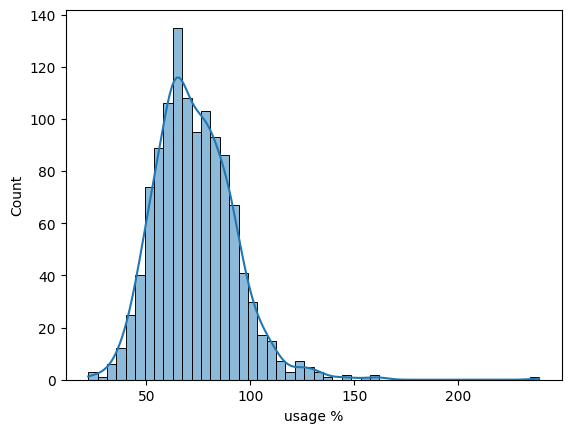

In [307]:
# visualizing the usage %
sns.histplot(data=population_df['usage %'], kde=True)
plt.show()

# We can see that the usage % is normally distributed but there are values where the usage is more than 100% making the school overcrowded 
# On the other hand there are values where the usage is less than 50% making the school underutilized

In [308]:
# Now in the final step we will assign a z-score as per the usage % of the school
# Calculate Z-score for 'usage %'
population_df["z_score"] = zscore(population_df["usage %"])

alpha = 0.5
population_df["population_score"] = round(np.exp(-alpha * population_df['z_score']**2), 2)

# Display summary
population_df = population_df[['ID', 'region_name', 'district_name', 'school_name', 'usage %', 'z_score', 'population_score']]
population_df.head()


,ID,region_name,district_name,school_name,usage %,z_score,population_score
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,76.58,0.168979,0.99
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,80.57,0.375911,0.93
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,81.60,0.429330,0.91
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,69.32,-0.207545,0.98
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,68.81,-0.233995,0.97


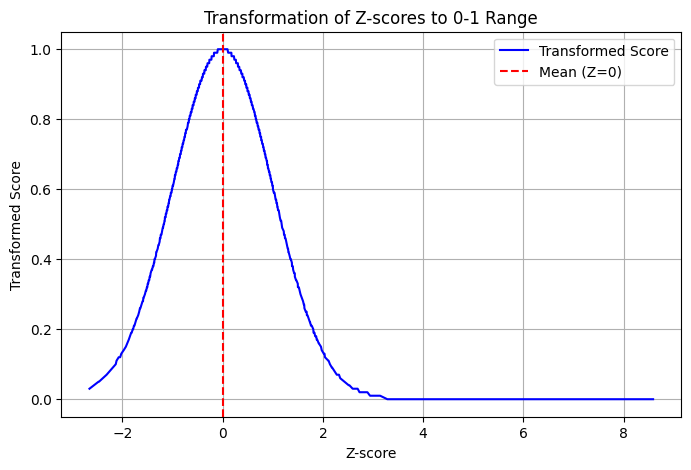

In [309]:
# Generate a range of Z-scores from -4 to 4
z_scores = population_df['z_score']
# Define alpha value for scaling
alpha = 0.5

# Compute the transformed scores
transformed_scores = population_df['population_score']

# Plot the transformation
plt.figure(figsize=(8, 5))
sns.lineplot(x=z_scores, y=transformed_scores, color='blue', label="Transformed Score")
plt.axvline(0, color='red', linestyle='--', label="Mean (Z=0)")
plt.xlabel("Z-score")
plt.ylabel("Transformed Score")
plt.title("Transformation of Z-scores to 0-1 Range")
plt.legend()
plt.grid(True)
plt.show()

In [310]:
print("Min score:", population_df["population_score"].min())
print("Max score:", population_df["population_score"].max())

Min score: 0.0
Max score: 1.0


#### 2. Resources_df

In [311]:
resources_df.head()

,id,Region name,District name,School name,"Availability of sports equipment in accordance with standards (balls, benches, ropes, mats, dumbbells, rings, sticks, chess, etc.)",Availability of drinking water and handwashing facilities in the kitchen,Is there a generator in the school?,Are there solar panels in the school (above 10 kW),Source of the heating system,Fuel source for local or improvised heating systems,Availability of water in the school,Source of drinking water supply,Type of internet connection,Internet usage,Availability of fire safety equipment (fire extinguishers and other devices) and alarm systems,Availability of video surveillance cameras,Availability of public transport stops nearby,Facilities for students with musculoskeletal disorders:,Where is the functioning restroom located in the school?,Availability of doors and partitions in restroom stalls,Availability of water and soap for handwashing near restrooms,Do you think the restroom is safe for children?,Do you think there is a connection between the condition of restrooms and students' willingness to attend school?,Do you think the classrooms are warm during the autumn-winter season?,"Does the school building have a water pipeline, and does water flow through it?"
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,Almost everything is available,Completely absent,Not available,"Available, providing energy to the school",Local (the heating boiler is located within th...,Coal,Available and safe to drink,Centralized (supplied through pipes from outsi...,By fiber optic or wired cable,Used within the scope of lessons,Available,Available both in the yard and inside the buil...,"Available, approximately 500 meters away",Available,In the yard,"There are barriers, but there are no separate ...",Available,"Yes, safe",No,"Yes, hot","No, there is neither water nor pipes"
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,Almost everything is available,Completely absent,Not available,Not available,Local (the heating boiler is located within th...,Coal,Available and safe to drink,Local (a well/artesian source or water tower i...,By fiber optic or wired cable,Used within the scope of lessons,Available,Available both in the yard and inside the buil...,"Available, approximately 500 meters away",Available,In the yard,Available,Available,"Yes, safe",No,"Yes, hot","No, there is neither water nor pipes"
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,Almost everything is available,Completely absent,Available,Not available,Local (the heating boiler is located within th...,Coal,Available and safe to drink,Local (a well/artesian source or water tower i...,By fiber optic or wired cable,Used within the scope of lessons,Available,Available both in the yard and inside the buil...,"Available, approximately 200 meters away",Available,In the yard,"There are barriers, but there are no separate ...",Available,"Yes, safe",No,"Yes, hot","No, there is neither water nor pipes"
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,Almost everything is available,Completely absent,Available,"Available, providing energy to the school",Local (the heating boiler is located within th...,Coal,Available and safe to drink,Centralized (supplied through pipes from outsi...,By fiber optic or wired cable,Used within the scope of lessons,Available,Available both in the yard and inside the buil...,"Available, approximately 200 meters away",Available,In the yard,Available,"Water is available, but there is no soap","Yes, safe",No,"Yes, hot","No, there is neither water nor pipes"
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,Almost everything is available,Completely absent,Available,Not available,Local (the heating boiler is located within th...,Coal,Available and safe to drink,Centralized (supplied through pipes from outsi...,By fiber optic or wired cable,Used within the

In [312]:
resources_df.columns

Index(['id', 'Region name', 'District name', 'School name',
       'Availability of sports equipment in accordance with standards (balls, benches, ropes, mats, dumbbells, rings, sticks, chess, etc.)',
       'Availability of drinking water and handwashing facilities in the kitchen',
       'Is there a generator in the school?',
       'Are there solar panels in the school (above 10 kW)',
       'Source of the heating system',
       'Fuel source for local or improvised heating systems',
       'Availability of water in the school',
       'Source of drinking water supply', 'Type of internet connection',
       'Internet usage',
       'Availability of fire safety equipment (fire extinguishers and other devices) and alarm systems',
       'Availability of video surveillance cameras',
       'Availability of public transport stops nearby',
       'Facilities for students with musculoskeletal disorders:',
       'Where is the functioning restroom located in the school?',
       'Availabil

In [313]:
resources_df.rename(columns={"id": "ID",
                            "Region name": "region_name",
                            "District name": "district_name",
                            "School name": "school_name",
                            "Availability of sports equipment in accordance with standards (balls, benches, ropes, mats, dumbbells, rings, sticks, chess, etc.)": "sports_equipment",
                            "Availability of drinking water and handwashing facilities in the kitchen": "drinking_water",
                            "Is there a generator in the school?": "generator",
                            'Are there solar panels in the school (above 10 kW)': 'solar_panels',
                            'Source of the heating system': 'heating_system',
                            'Fuel source for local or improvised heating systems': 'fuel_source',
                            'Availability of water in the school': 'water',
                            'Source of drinking water supply': 'drinking_water_supply',
                            'Type of internet connection': 'internet_connection',
                            'Internet usage': 'internet_usage',
                            'Availability of fire safety equipment (fire extinguishers and other devices) and alarm systems': 'fire_safety',
                            'Availability of video surveillance cameras': 'video_surveillance',
                            'Availability of public transport stops nearby': 'public_transport',
                            'Facilities for students with musculoskeletal disorders': 'musculoskeletal_disorders',
                            'Where is the functioning restroom located in the school?': 'restroom_location',
                            'Availability of doors and partitions in restroom stalls': 'restroom_stalls',
                            'Availability of water and soap for handwashing near restrooms': 'handwashing',
                            'Do you think the restroom is safe for children?': 'restroom_safe',
                            "Do you think there is a connection between the condition of restrooms and students' willingness to attend school?": 'restroom_connection',
                            'Do you think the classrooms are warm during the autumn-winter season?': 'classrooms_warm',
                            'Does the school building have a water pipeline, and does water flow through it?': 'water_pipeline'
                            }, inplace=True)

In [314]:
# Exclude non-categorical columns
exclude_cols = ['ID', 'region_name', 'district_name', 'school_name']
categorical_cols = [col for col in resources_df.columns if col not in exclude_cols]

# Print unique values for each column
for col in categorical_cols:
    print(f"\n{col}:")
    print(resources_df[col].unique())


sports_equipment:
['Almost everything is available'
 'Partially available (many items are worn out, missing, or damaged)' 'no']

drinking_water:
['Completely absent' 'Water and sink are available' 'No sink available']

generator:
['Not available' 'Available']

solar_panels:
['Available, providing energy to the school' 'Not available'
 'Installed but not functioning'
 'Available, but it supplies energy to the main grid']

heating_system:
['Local (the heating boiler is located within the school premises)'
 'Centralized (the heating system boiler is not located within the school premises)'
 'Hand-made (burzhuyka) stoves are placed in several rooms of the school']

fuel_source:
['Coal' 'Gas'
 'Centralized (the heating system boiler is not located within the school premises)'
 'other']

water:
['Available and safe to drink'
 'Water is available, but it is not safe for drinking; it is used for technical needs (handwashing, cleaning, watering trees, etc.)'
 'Not available']

drinking_water_s

In [315]:
# Create mappings for each column
column_mappings = {
    'sports_equipment': {
        'Almost everything is available': 1,
        'Partially available (many items are worn out, missing, or damaged)': 0.5,
        'no': 0
    },
    'drinking_water': {
        'Water and sink are available': 1,
        'No sink available': 0.5,
        'Completely absent': 0
    },
    
    'generator': {
        'Available': 1,
        'Not available': 0
    },
    
    'solar_panels': {
        'Available, providing energy to the school': 1,
        'Available, but it supplies energy to the main grid': 0.7,
        'Installed but not functioning': 0.3,
        'Not available': 0
    },
    
    'heating_system': {
        'Local (the heating boiler is located within the school premises)': 1,
        'Centralized (the heating system boiler is not located within the school premises)': 0.8,
        'Hand-made (burzhuyka) stoves are placed in several rooms of the school': 0.3
    },
    
    'fuel_source': {
        'Gas': 1,
        'Centralized (the heating system boiler is not located within the school premises)': 0.8,
        'Coal': 0.5,
        'other': 0.3
    },
    
    'water': {
        'Available and safe to drink': 1,
        'Water is available, but it is not safe for drinking; it is used for technical needs (handwashing, cleaning, watering trees, etc.)': 0.5,
        'Not available': 0
    },
    
    'drinking_water_supply': {
        'Centralized (supplied through pipes from outside the school premises)': 1,
        'Local (a well/artesian source or water tower is located within the school premises)': 0.8,
        'Delivered by truck and stored in a large container (reservoir)': 0.5,
        'Not available': 0
    },
    
    'internet_connection': {
        'By fiber optic or wired cable': 1,
        'By mobile communication': 0.5,
        'Not available at all': 0
    },
    
    'internet_usage': {
        'Used within the scope of lessons': 1,
        'Restricted (only for school administration)': 0.5,
        'Not available at all': 0
    },
    
    'fire_safety': {
        'Available': 1,
        'Partially available': 0.5,
        'Not available': 0
    },
    
    'video_surveillance': {
        'Available both in the yard and inside the building': 1,
        'Cameras are installed but not functioning': 0.3,
        'Not available': 0
    },
    
    'public_transport': {
        'Available, approximately 200 meters away': 1,
        'Available, approximately 500 meters away': 0.7,
        'Not available or very far away': 0
    },
    
    'Facilities for students with musculoskeletal disorders:': {
        'Available': 1,
        'Partially': 0.5,
        'Not available': 0,
        np.nan: 0  # Handling missing values
    },
    
    'restroom_location': {
        'Available in both locations': 1,
        'Inside the building': 0.8,
        'In the yard': 0.4,
        'Not available': 0
    },
    
    'restroom_stalls': {
        'Available': 1,
        'There are barriers, but there are no separate cabins and doors': 0.5,
        'Not available': 0
    },
    
    'handwashing': {
        'Available': 1,
        'Water is available, but there is no soap': 0.5,
        'Not available': 0
    },
    
    'restroom_safe': {
        'Yes, safe': 1,
        "No, it's dangerous": 0,
        "I don't know": 0.5
    },
    
    'restroom_connection': {
        'Yes': 1,
        'No': 0
    },
    
    'classrooms_warm': {
        'Yes, hot': 1,
        'No, cold': 0
    },
    
    'water_pipeline': {
        'Yes, water comes through the tap': 1,
        'Yes, the pipe is laid, but there is no water flow': 0.3,
        'No, there is neither water nor pipes': 0
    }
}

# Function to apply mappings to all columns
def apply_mappings(df, mappings):
    df_transformed = df.copy()
    for column, mapping in mappings.items():
        if column in df.columns:
            df_transformed[column] = df_transformed[column].map(mapping)
    return df_transformed

# Apply the mappings to your dataframe
resources_df_transformed = apply_mappings(resources_df, column_mappings)

# Display the first few rows of transformed data
print("First few rows of transformed data:")
display(resources_df_transformed.head())

# Verify that all values have been properly mapped
print("\nChecking for any unmapped values (will show NaN if any):")
for col in column_mappings.keys():
    if col in resources_df.columns:
        null_count = resources_df_transformed[col].isnull().sum()
        if null_count > 0:
            print(f"{col}: {null_count} unmapped values")

First few rows of transformed data:


,ID,region_name,district_name,school_name,sports_equipment,drinking_water,generator,solar_panels,heating_system,fuel_source,water,drinking_water_supply,internet_connection,internet_usage,fire_safety,video_surveillance,public_transport,Facilities for students with musculoskeletal disorders:,restroom_location,restroom_stalls,handwashing,restroom_safe,restroom_connection,classrooms_warm,water_pipeline
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,1.0,0.0,0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.7,1.0,0.4,0.5,1.0,1.0,0,1,0.0
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,1.0,0.0,0,0.0,1.0,0.5,1.0,0.8,1.0,1.0,1.0,1.0,0.7,1.0,0.4,1.0,1.0,1.0,0,1,0.0
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,1.0,0.0,1,0.0,1.0,0.5,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,0.4,0.5,1.0,1.0,0,1,0.0
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,1.0,0.0,1,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.4,1.0,0.5,1.0,0,1,0.0
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,1.0,0.0,1,0.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.3,1.0,1.0,0.4,1.0,1.0,1.0,0,1,0.0



Checking for any unmapped values (will show NaN if any):


Top 10 Schools by Resources Score:


,school_name,region_name,resources_score_normalized
1106,62-сонли умумий ўрта таълим мактаби,Samarkand region,100.000000
426,2-сонли умумий ўрта таълим мактаби,Samarkand region,97.945205
647,72-sonli umumiy o'rta ta'lim maktabi,Samarkand region,97.260274
1090,47-sonli umumiy o'rta ta'lim maktabi,Samarkand region,97.260274
337,2-сонли ихтисослаштирилган давлат умумтаълим м...,Samarkand region,96.575342
557,106-sonli umumiy o'rta ta'lim maktabi,Samarkand region,96.575342
448,4-сонли умумий ўрта таълим мактаби,Samarkand region,95.890411
459,5-сонли умумий ўрта таълим мактаби,Samarkand region,95.890411
1171,158-сонли умумий ўрта таълим мактаби,Samarkand region,95.890411
1177,20-сонли умумий ўрта таълим мактаби,Samarkand region,95.890411



Score Statistics:
count    1261.000000
mean       63.261382
std        17.325068
min         0.000000
25%        51.369863
50%        64.383562
75%        76.712329
max       100.000000
Name: resources_score_normalized, dtype: float64


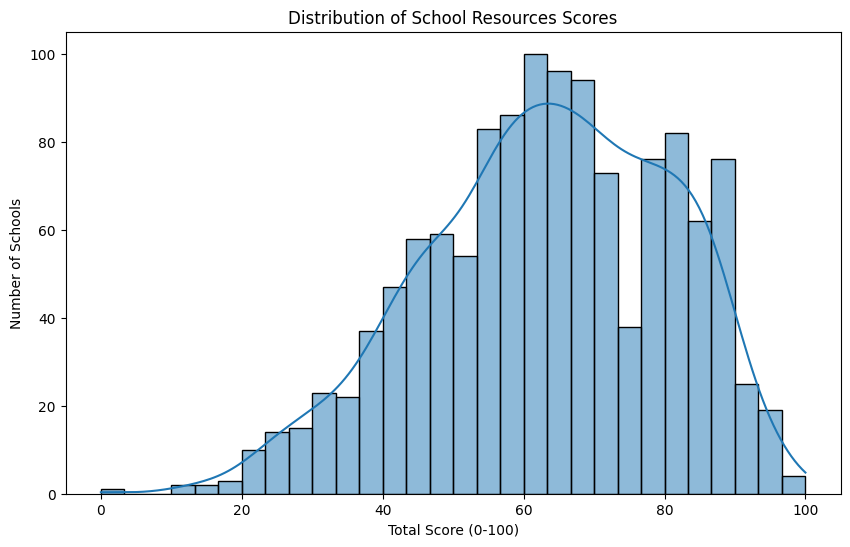


Average Scores by Region:


,mean,count
region_name,,
Samarkand region,63.261382,1261


In [316]:
# Calculate simple sum score
# First, get only the columns we want to sum (excluding ID and name columns)
score_columns = resources_df_transformed.columns.difference(['ID', 'school_name', 'region_name', 'district_name'])

# Calculate total score by summing all columns
resources_df_transformed['total_score'] = resources_df_transformed[score_columns].sum(axis=1)

# Normalize the total score to 0-100 scale for easier interpretation
resources_df_transformed['resources_score_normalized'] = ((resources_df_transformed['total_score'] - resources_df_transformed['total_score'].min()) / 
                                                    (resources_df_transformed['total_score'].max() - resources_df_transformed['total_score'].min())) * 100

# Show top 10 schools
print("Top 10 Schools by Resources Score:")
top_10_schools = resources_df_transformed[['school_name', 'region_name', 'resources_score_normalized']].nlargest(10, 'resources_score_normalized')
display(top_10_schools)

# Basic statistics of the scores
print("\nScore Statistics:")
print(resources_df_transformed['resources_score_normalized'].describe())

# Visualize the distribution of scores
plt.figure(figsize=(10, 6))
sns.histplot(data=resources_df_transformed, x='resources_score_normalized', bins=30, kde=True)
plt.title('Distribution of School Resources Scores')
plt.xlabel('Total Score (0-100)')
plt.ylabel('Number of Schools')
plt.show()

# Show average scores by region
print("\nAverage Scores by Region:")
regional_scores = resources_df_transformed.groupby('region_name')['resources_score_normalized'].agg(['mean', 'count']).sort_values('mean', ascending=False)
display(regional_scores)

#### 3. Infrastructure_df

In [317]:
infrastructure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 36 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                             --------------  ----- 
 0   id                                                                                                                                 1261 non-null   int64 
 1   Region name                                                                                                                        1261 non-null   object
 2   District name                                                                                                                      1261 non-null   object
 3   School name                                                                                  

In [318]:
infrastructure_df.columns

Index(['id', 'Region name', 'District name', 'School name',
       'Enter the type of wall material:', 'Condition of the building walls',
       'Enter the type of roofing material of the building',
       'Condition of the building roof',
       'Condition of windows and frames in classrooms',
       'Condition of the floors in classrooms',
       'Condition of the doors in classrooms',
       'Is the condition of the library satisfactory?',
       'Condition of the gymnasium', 'Condition of the stadium',
       'Condition of the assembly hall', 'Condition of the kitchen',
       'Condition of the internal electrical system',
       'Condition of the lighting system',
       'Condition of the school boiler room',
       'Condition of the internal heating system (pipes and radiators)',
       'Condition of water supply inside the restrooms',
       'Is the restroom connected to the central sewage system?',
       'Are there any issues connecting the indoor restrooms to the sewage syste

In [319]:
column_rename = {
    'id': 'ID',
    'Region name': 'region_name',
    'District name': 'district_name',
    'School name': 'school_name',
    'Enter the type of wall material:': 'wall_material',
    'Condition of the building walls': 'wall_condition',
    'Enter the type of roofing material of the building': 'roof_material',
    'Condition of the building roof': 'roof_condition',
    'Condition of windows and frames in classrooms': 'windows_condition',
    'Condition of the floors in classrooms': 'floor_condition',
    'Condition of the doors in classrooms': 'door_condition',
    'Is the condition of the library satisfactory?': 'library_condition',
    'Condition of the gymnasium': 'gym_condition',
    'Condition of the stadium': 'stadium_condition',
    'Condition of the assembly hall': 'hall_condition',
    'Condition of the kitchen': 'kitchen_condition',
    'Condition of the internal electrical system': 'electrical_system',
    'Condition of the lighting system': 'lighting_system',
    'Condition of the school boiler room': 'boiler_condition',
    'Condition of the internal heating system (pipes and radiators)': 'heating_system',
    'Condition of water supply inside the restrooms': 'restroom_water',
    'Is the restroom connected to the central sewage system?': 'sewage_connection',
    'Are there any issues connecting the indoor restrooms to the sewage system?': 'sewage_issues',
    'Are there any issues connecting the indoor restrooms to the water supply system?': 'water_supply_issues',
    'Are there lights inside the restrooms, and are they safe for children?': 'restroom_lighting',
    'Are there concrete/asphalt pathways between buildings and outdoor restrooms?': 'restroom_pathway',
    'Conditions for dining': 'dining_condition',
    'Is the school perimeter fenced with a boundary wall?': 'boundary_wall',
    'Have any repair or reconstruction works been carried out in the building?': 'repairs_done',
    'Do you consider the building safe during an earthquake?': 'earthquake_safety',
    '(QUESTION MAINLY FOR RURAL SCHOOLS) Are children in your microdistrict forced to walk more than 3 km one way to reach the school?': 'distance_to_school',
    'Do you think your school\'s infrastructure meets modern educational requirements?': 'modern_standards',
    'Are you satisfied with the condition of your school?': 'satisfaction',
    'What material are the walls of the outdoor restroom made of?': 'outdoor_restroom_material',
    'What is the condition of the outdoor restroom?': 'outdoor_restroom_condition',
    'What is the condition of the standard (project-based) restroom?': 'indoor_restroom_condition'
}

# Rename the columns
infrastructure_df = infrastructure_df.rename(columns=column_rename)

In [320]:
# Exclude non-categorical columns
exclude_cols = ['ID', 'region_name', 'district_name', 'school_name']
categorical_cols = [col for col in infrastructure_df.columns if col not in exclude_cols]

# Print unique values for each column
for col in categorical_cols:
    print(f"\n{col}:")
    print(infrastructure_df[col].unique())


wall_material:
['brick' 'wattle' nan 'concrete' 'stone']

wall_condition:
['In satisfactory condition (no cracks, other flaws or defects)'
 'In unsatisfactory condition (has cracks or other flaws and defects)'
 ' In case of emergency' nan]

roof_material:
['profnastyle' 'slate' nan ' bitumen' 'other']

roof_condition:
['Satisfactory (no cracks or other defects) - no repairs required'
 'Partial repair required (some areas are cracked or have other defects)'
 'Needs to be completely replaced (there are many cracks or other defects)'
 nan]

windows_condition:
['Satisfactory (almost all frames are adequate, whole, openable) - i.e. no repairs required'
 'Partial repair required (some frames do not open or have other defects)'
 'Needs to be completely replaced (almost all frames are either not opening or are worn out)'
 nan
 'Partially in need of repair (some frames do not open or have other defects)']

floor_condition:
['Partially in need of repair (floors in some classrooms are rotten or 

Top 10 Schools by Infrastructure Score:


,school_name,region_name,total_infrastructure_score_normalized
964,55-sonli umumiy o'rta ta'lim maktabi,Samarkand region,98.7500
426,2-сонли умумий ўрта таълим мактаби,Samarkand region,97.5000
998,1-sonli umumiy o'rta ta'lim maktabi,Samarkand region,97.1875
961,52 -sonli umumiy o'rta ta'lim maktabi,Samarkand region,96.2500
1043,53-sonli umumiy o'rta ta'lim maktabi,Samarkand region,95.0000
1168,154-сонли умумий ўрта таълим мактаби,Samarkand region,95.0000
955,47-sonli umumiy o'rta ta'lim maktabi,Samarkand region,94.6875
386,47-сонли умумий ўрта таълим мактаби,Samarkand region,94.6875
930,24-sonli umumiy o'rta ta'lim maktabi,Samarkand region,94.3750
948,40-sonli umumiy o'rta ta'lim maktabi,Samarkand region,94.3750



Score Statistics:
count    1261.000000
mean       68.384962
std        14.343522
min        17.500000
25%        59.375000
50%        70.937500
75%        79.062500
max        98.750000
Name: total_infrastructure_score_normalized, dtype: float64


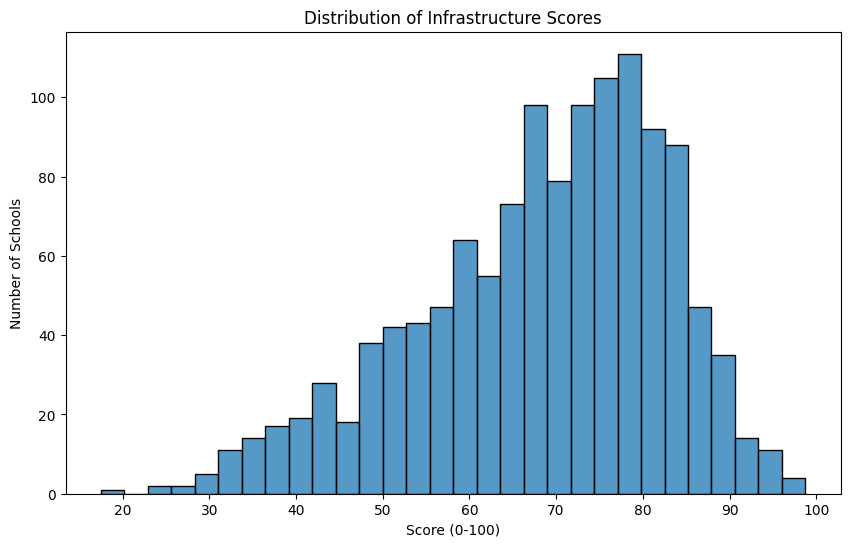

In [321]:
# Create mappings for each column
infrastructure_mappings = {
    'wall_material': {
        'concrete': 1.0,
        'brick': 0.8,
        'stone': 0.7,
        'wattle': 0.4,
        np.nan: 0
    },
    
    'wall_condition': {
        'In satisfactory condition (no cracks, other flaws or defects)': 1.0,
        'In unsatisfactory condition (has cracks or other flaws and defects)': 0.3,
        'In case of emergency': 0,
        np.nan: 0
    },
    
    'roof_material': {
        'profnastyle': 1.0,
        'slate': 0.8,
        'bitumen': 0.6,
        'other': 0.4,
        np.nan: 0
    },
    
    'roof_condition': {
        'Satisfactory (no cracks or other defects) - no repairs required': 1.0,
        'Partial repair required (some areas are cracked or have other defects)': 0.5,
        'Needs to be completely replaced (there are many cracks or other defects)': 0,
        np.nan: 0
    },
    
    'windows_condition': {
        'Satisfactory (almost all frames are adequate, whole, openable) - i.e. no repairs required': 1.0,
        'Partial repair required (some frames do not open or have other defects)': 0.5,
        'Partially in need of repair (some frames do not open or have other defects)': 0.5,
        'Needs to be completely replaced (almost all frames are either not opening or are worn out)': 0,
        np.nan: 0
    },
    
    'floor_condition': {
        'Satisfactory (almost all floors are intact) – meaning no repairs are needed': 1.0,
        'Partially in need of repair (floors in some classrooms are rotten or require maintenance)': 0.5,
        'Needs complete replacement (almost all floors are damaged)': 0,
        'No wooden or other types of flooring available at all': 0,
        np.nan: 0
    },
    
    'door_condition': {
        'Satisfactory (almost all doors are present, intact, and functional) – meaning no repairs are needed': 1.0,
        'Partially in need of repair (some doors do not open or have other defects)': 0.5,
        'Needs complete replacement (almost all doors have defects and issues)': 0,
        np.nan: 0
    },
    
    'library_condition': {
        'yes': 1.0,
        'Available, but no furniture': 0.5,
        'no': 0,
        'Not available': 0
    },
    
    'gym_condition': {
        'Satisfactory (the floor is not rotten, its covering, frames/windows, ceiling, walls, and fixtures attached to the ceiling or walls are intact) – meaning no repairs are needed': 1.0,
        'Partially in need of repair (floor or its covering, frames/windows, ceiling, walls, and fixtures attached to the ceiling or walls have defects)': 0.5,
        'Not available': 0,
        ' Not available': 0
    },
    
    'stadium_condition': {
        'Satisfactory (the surface layer is even, with a drainage path around the football goals) – meaning no repairs are needed': 1.0,
        'Partially in need of repair (the surface layer is uneven, there is no drainage path around the football goals, or there are other defects)': 0.5,
        'Not available': 0
    },
    
    'hall_condition': {
        'Satisfactory (almost all seats are intact, sufficient, and functional, and the stage is in good condition) – meaning no repairs are needed': 1.0,
        'Partially in need of repair (some seats have defects or are insufficient, the stage requires repair, or there are other issues)': 0.5,
        'There is an activity hall, but there are no seats': 0.3,
        'Completely absent': 0
    },
    
    'kitchen_condition': {
        'Satisfactory (the condition of the walls, floors, kitchen equipment, and furniture is acceptable) – meaning no repairs are needed': 1.0,
        'Partially in need of repair (floor and walls, furniture and equipment are worn out or need maintenance, or there are other defects)': 0.5,
        'There is a cafeteria, but it is not operational': 0.2,
        'There is no cafeteria at all': 0
    },
    
    'electrical_system': {
        'Satisfactory (wires, switches, circuit breakers, and sockets are in working condition) – meaning no repairs are needed': 1.0,
        'Partially in need of repair (some wires are disconnected, switches, circuit breakers, and sockets are non-functional)': 0.5,
        'Needs complete replacement (wires are disconnected in most places, switches, circuit breakers, and sockets are non-functional or outdated)': 0
    },
    
    'lighting_system': {
        'Satisfactory (fully modern LED lighting installed)': 1.0,
        'Partially modern lighting installed (some LED lights are in place)': 0.5,
        'No modern LED lighting installed at all': 0
    },
    
    'boiler_condition': {
        'Operational': 1.0,
        'Needs repair or replacement': 0
    },
    
    'heating_system': {
        'Operational (all pipes and radiators are in good condition and provide heat)': 1.0,
        'Needs repair or replacement (some or all pipes and radiators have defects and do not provide heat)': 0
    },
    
    'restroom_water': {
        'Yes, water is available for handwashing and toilet use': 1.0,
        'Yes, there is water available only for handwashing': 0.7,
        'Yes, the pipe is laid, but there is no water flow': 0.3,
        'No, there is neither water nor pipes': 0
    },
    
    'sewage_connection': {
        'Yes, it is connected to the central sewage system and exits through pipes from outside the school': 1.0,
        'There is a septic tank (special) in the school yard': 0.7,
        'There is no sewage system at all': 0
    },
    
    'sewage_issues': {
        'No': 1.0,
        'Yes': 0,
        'There are no restrooms inside the building': 0
    },
    
    'water_supply_issues': {
        'No': 1.0,
        'Yes': 0,
        'There are no restrooms inside the building': 0
    },
    
    'restroom_lighting': {
        'Yes': 1.0,
        'No': 0
    },
    
    'restroom_pathway': {
        'Available': 1.0,
        'Partially available': 0.5,
        'Not available': 0
    },
    
    'dining_condition': {
        'There is a kitchen and a cafeteria': 1.0,
        'There is a kitchen available for preparing hot meals': 0.8,
        'Only a cafeteria is available (there are no facilities for preparing hot meals)': 0.4,
        'There is neither a cafeteria nor a kitchen': 0
    },
    
    'boundary_wall': {
        'Fully fenced': 1.0,
        'Partially available': 0.5,
        'Not fenced': 0
    },
    
    'repairs_done': {
        'Yes, major renovation': 1.0,
        'Yes, reconstruction': 0.8,
        'Yes, current maintenance': 0.6,
        'Not avaible': 0
    },
    
    'earthquake_safety': {
        'Yes, safe': 1.0,
        'I don\'t know': 0.5,
        'No, dangerous': 0,
        np.nan: 0
    },
    
    'distance_to_school': {
        'There is no such problem': 1.0,
        'My school is located in the city': 1.0,
        'Yes, not many (around 20%)': 0.8,
        'Yes, a lot (less than 50%)': 0.5,
        'Yes, a lot (not available in 80% of the areas)': 0
    },
    
    'modern_standards': {
        'yes': 1.0,
        'I don\'t know': 0.5,
        'no': 0
    },
    
    'satisfaction': {
        'I am satisfied': 1.0,
        'I am not satisfied': 0.3,
        'I am extremely dissatisfied': 0
    },
    
    'outdoor_restroom_material': {
        'Reinforced concrete': 1.0,
        'Baked brick': 0.8,
        'Stone': 0.7,
        'Raw brick': 0.5,
        'Wattle': 0.3,
        'wattle': 0.3,
        'Inside the building': 1.0,
        np.nan: 0
    },
    
    'outdoor_restroom_condition': {
        'Standard (constructed based on a design)': 1.0,
        'Customized (made of clay, sponsorship, stone, wood, or straw)': 0.5,
        'Inside the building': 1.0,
        np.nan: 0
    },
    
    'indoor_restroom_condition': {
        'Repaired - satisfactory': 1.0,
        'Needs repair - unsatisfactory': 0.3,
        'In an emergency condition': 0,
        np.nan: 0
    }
}

# Function to apply mappings and calculate total score
def apply_infrastructure_scores(df, mappings):
    df_scored = df.copy()
    
    # Apply mappings to each column
    for column, mapping in mappings.items():
        if column in df.columns:
            df_scored[column] = df_scored[column].map(mapping)
    
    # Calculate total score (sum of all scored columns)
    score_columns = list(mappings.keys())
    df_scored['total_infrastructure_score'] = df_scored[score_columns].sum(axis=1)
    
    # Normalize total score to 0-100 scale
    max_possible_score = len(score_columns)  # Since each column is scored 0-1
    df_scored['total_infrastructure_score_normalized'] = (df_scored['total_infrastructure_score'] / max_possible_score) * 100
    
    return df_scored

# Apply scores to the dataframe
infrastructure_df_scored = apply_infrastructure_scores(infrastructure_df, infrastructure_mappings)

# Display results
print("Top 10 Schools by Infrastructure Score:")
top_10 = infrastructure_df_scored[['school_name', 'region_name', 'total_infrastructure_score_normalized']].nlargest(10, 'total_infrastructure_score_normalized')
display(top_10)

# Basic statistics
print("\nScore Statistics:")
print(infrastructure_df_scored['total_infrastructure_score_normalized'].describe())

# Visualize score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=infrastructure_df_scored, x='total_infrastructure_score_normalized', bins=30)
plt.title('Distribution of Infrastructure Scores')
plt.xlabel('Score (0-100)')
plt.ylabel('Number of Schools')
plt.show()

In [322]:
infrastructure_df_scored.drop(['total_infrastructure_score'], axis=1, inplace=True)
infrastructure_df_scored.head()


,ID,region_name,district_name,school_name,wall_material,wall_condition,roof_material,roof_condition,windows_condition,floor_condition,door_condition,library_condition,gym_condition,stadium_condition,hall_condition,kitchen_condition,electrical_system,lighting_system,boiler_condition,heating_system,restroom_water,sewage_connection,sewage_issues,water_supply_issues,restroom_lighting,restroom_pathway,dining_condition,boundary_wall,repairs_done,earthquake_safety,distance_to_school,modern_standards,satisfaction,outdoor_restroom_material,outdoor_restroom_condition,indoor_restroom_condition,total_infrastructure_score_normalized
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,0.8,1.0,1.0,1.0,1.0,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0.0,0.5,1.0,0.0,0.7,0.7,0.0,0.0,1.0,1.0,0.8,1.0,0.6,1.0,1.0,1.0,1.0,0.7,1.0,1.0,71.2500
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.7,0.7,0.0,0.0,1.0,1.0,0.0,0.5,0.8,1.0,0.8,1.0,1.0,0.8,1.0,1.0,78.4375
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,0.8,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.7,0.7,0.0,0.0,1.0,1.0,0.4,0.5,0.8,1.0,1.0,1.0,1.0,0.8,1.0,1.0,76.5625
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,0.8,1.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.7,0.0,0.0,0.0,1.0,1.0,0.4,0.5,0.8,1.0,0.8,1.0,1.0,0.8,1.0,1.0,74.3750
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,0.8,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.7,0.7,0.0,0.0,1.0,1.0,0.0,0.5,0.0,1.0,0.8,1.0,1.0,0.8,1.0,1.0,75.3125


In [323]:
# Now we can merge all the dataframes
population_df = pd.merge(population_df, resources_df_transformed, on=['ID','region_name', 'district_name', 'school_name'], how='left')
final_df = pd.merge(population_df, infrastructure_df_scored, on=['ID','region_name', 'district_name', 'school_name'], how='left')

In [324]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 63 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   ID                                                       1178 non-null   int64  
 1   region_name                                              1178 non-null   object 
 2   district_name                                            1178 non-null   object 
 3   school_name                                              1178 non-null   object 
 4   usage %                                                  1178 non-null   float64
 5   z_score                                                  1178 non-null   float64
 6   population_score                                         1178 non-null   float64
 7   sports_equipment                                         1178 non-null   float64
 8   drinking_water              

In [325]:
final_df[['wall_condition', 'roof_material', 'earthquake_safety']].isnull().sum()


wall_condition         7
roof_material          4
earthquake_safety    119
dtype: int64

In [326]:
final_df['earthquake_safety'].dropna().unique()
final_df['earthquake_safety'].fillna(final_df['earthquake_safety'].mode()[0], inplace=True)
final_df['earthquake_safety'].isnull().sum()
final_df.dropna(subset=['wall_condition', 'roof_material'], inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_13120\2959707105.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['earthquake_safety'].fillna(final_df['earthquake_safety'].mode()[0], inplace=True)


### Data Wrangling Code

In [327]:
final_df.head()

,ID,region_name,district_name,school_name,usage %,z_score,population_score,sports_equipment,drinking_water,generator,solar_panels,heating_system_x,fuel_source,water,drinking_water_supply,internet_connection,internet_usage,fire_safety,video_surveillance,public_transport,Facilities for students with musculoskeletal disorders:,restroom_location,restroom_stalls,handwashing,restroom_safe,restroom_connection,classrooms_warm,water_pipeline,total_score,resources_score_normalized,wall_material,wall_condition,roof_material,roof_condition,windows_condition,floor_condition,door_condition,library_condition,gym_condition,stadium_condition,hall_condition,kitchen_condition,electrical_system,lighting_system,boiler_condition,heating_system_y,restroom_water,sewage_connection,sewage_issues,water_supply_issues,restroom_lighting,restroom_pathway,dining_condition,boundary_wall,repairs_done,earthquake_safety,distance_to_school,modern_standards,satisfaction,outdoor_restroom_material,outdoor_restroom_condition,indoor_restroom_condition,total_infrastructure_score_normalized
0,1,Samarkand region,Bulungur district,1-sonli ixtisoslashtirilgan davlat umumta’lim ...,76.58,0.168979,0.99,1.0,0.0,0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.7,1.0,0.4,0.5,1.0,1.0,0,1,0.0,15.1,64.383562,0.8,1.0,1.0,1.0,1.0,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0.0,0.5,1.0,0.0,0.7,0.7,0.0,0.0,1.0,1.0,0.8,1.0,0.6,1.0,1.0,1.0,1.0,0.7,1.0,1.0,71.2500
1,2,Samarkand region,Bulungur district,10-sonli umumiy o'rta ta'lim maktabi,80.57,0.375911,0.93,1.0,0.0,0,0.0,1.0,0.5,1.0,0.8,1.0,1.0,1.0,1.0,0.7,1.0,0.4,1.0,1.0,1.0,0,1,0.0,14.4,59.589041,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.7,0.7,0.0,0.0,1.0,1.0,0.0,0.5,0.8,1.0,0.8,1.0,1.0,0.8,1.0,1.0,78.4375
2,3,Samarkand region,Bulungur district,11-sonli umumiy o'rta ta'lim maktabi,81.60,0.429330,0.91,1.0,0.0,1,0.0,1.0,0.5,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,0.4,0.5,1.0,1.0,0,1,0.0,15.2,65.068493,0.8,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.7,0.7,0.0,0.0,1.0,1.0,0.4,0.5,0.8,1.0,1.0,1.0,1.0,0.8,1.0,1.0,76.5625
3,4,Samarkand region,Bulungur district,12-sonli umumiy o'rta ta'lim maktabi,69.32,-0.207545,0.98,1.0,0.0,1,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.4,1.0,0.5,1.0,0,1,0.0,16.4,73.287671,0.8,1.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.7,0.0,0.0,0.0,1.0,1.0,0.4,0.5,0.8,1.0,0.8,1.0,1.0,0.8,1.0,1.0,74.3750
4,5,Samarkand region,Bulungur district,13-сонли умумий ўрта таълим мактаби,68.81,-0.233995,0.97,1.0,0.0,1,0.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.3,1.0,1.0,0.4,1.0,1.0,1.0,0,1,0.0,15.2,65.068493,0.8,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.7,0.7,0.0,0.0,1.0,1.0,0.0,0.5,0.0,1.0,0.8,1.0,1.0,0.8,1.0,1.0,75.3125


### What all manipulations have you done and insights you found?

Answer Here.